In [1]:
%load_ext autoreload
%autoreload 2
import parse_data.prepare_data as prepare_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import globals
import data_strings
import plotting.plot_octagon as plot_octagon
import plotting.plot_probability_chose_wall as plot_probability_chose_wall
import plotting.plot_trajectory as plot_trajectory
import analysis.wall_visibility_and_choice as wall_visibility_and_choice
import plotting.plot_probability_chose_wall as plot_probability_chose_wall
import data_extraction.trial_list_filters as trial_list_filters
from scipy.stats import norm

### Generic starting point for work on session data

In [2]:
single_session_index =17

In [3]:
data_folder = data_strings.DATA_FOLDER
json_filename_social = data_strings.JSON_FILENAMES_SOCIAL[single_session_index]
json_filenames_solo = data_strings.JSON_FILENAMES_SOLO[single_session_index*4 : single_session_index*4+4]

In [4]:
json_filenames_solo

['241220_1\\2024-12-20_17-36-27_KS20_FirstSolo.json',
 '241220_1\\2024-12-20_18-06-10_KS20_SecondSolo.json',
 '241220_1\\2024-12-20_17-36-54_CS20_FirstSolo.json',
 '241220_1\\2024-12-20_18-06-44_CS20_SecondSolo.json']

In [5]:
dfs_solo, trials_lists_solo = prepare_data.prepare_data(data_folder, json_filenames_solo, combine=False)

IntProgress(value=0, max=4)

filepath: O:\human_octagon\RAW\standard\241220_1\2024-12-20_17-36-27_KS20_FirstSolo.json
Loading complete.
Preprocessing complete.
filepath: O:\human_octagon\RAW\standard\241220_1\2024-12-20_18-06-10_KS20_SecondSolo.json
Loading complete.
Preprocessing complete.
filepath: O:\human_octagon\RAW\standard\241220_1\2024-12-20_17-36-54_CS20_FirstSolo.json
Loading complete.
Preprocessing complete.
filepath: O:\human_octagon\RAW\standard\241220_1\2024-12-20_18-06-44_CS20_SecondSolo.json
Loading complete.
Preprocessing complete.


In [6]:
df_social, trials_list_social = prepare_data.prepare_data(data_folder, json_filename_social, combine=False)

filepath: O:\human_octagon\RAW\standard\241220_1\2024-12-20_17-44-50_KS20_CS20_Social.json
Loading complete.
Preprocessing complete.


### plot session trajectories

In [7]:
titles=False

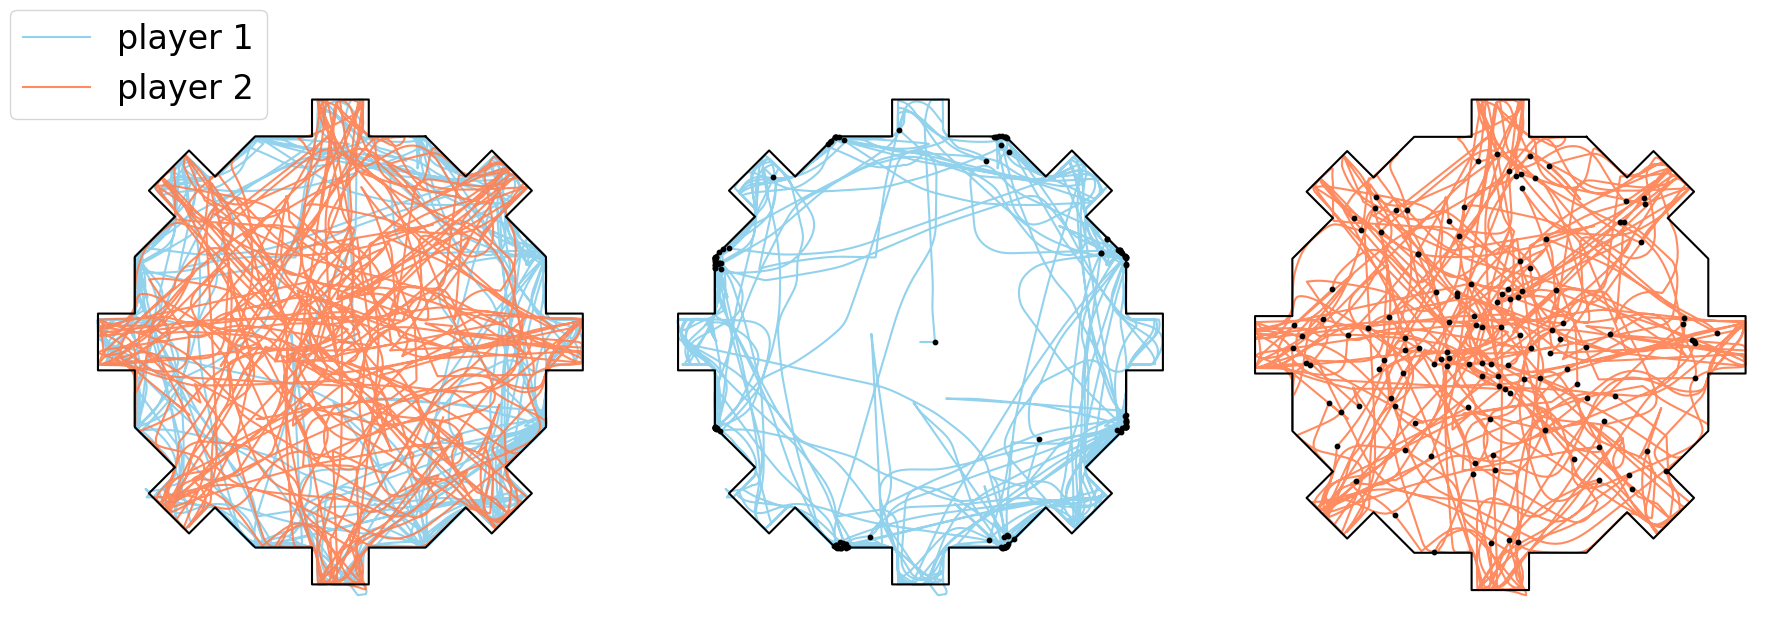

In [ ]:
# plot the full session trajectory for player 0, player 1, and combined

fig, axs = plt.subplots(1,3,figsize=(15*1.2,5*1.2))

axs[0] = plot_trajectory.plot_session_trajectory(axs[0], df_social, titles=titles)
axs[0] = plot_octagon.plot_octagon(axs[0])
for spine in axs[0].spines.values():
    spine.set_visible(False)
axs[0].tick_params(left=False, bottom=False)  # Turn off major ticks
axs[0].set_xticklabels([])
axs[0].set_yticklabels([])

axs[1] = plot_trajectory.plot_session_trajectory(axs[1], df_social, chosen_player=0, titles=titles)
axs[1] = plot_trajectory.mark_session_slice_onsets(axs[1], df_social, chosen_player=0, s=10)
axs[1] = plot_octagon.plot_octagon(axs[1])
for spine in axs[1].spines.values():
    spine.set_visible(False)
axs[1].tick_params(left=False, bottom=False)  # Turn off major ticks
axs[1].set_xticklabels([])
axs[1].set_yticklabels([])

axs[2] = plot_trajectory.plot_session_trajectory(axs[2], df_social, chosen_player=1, titles=titles)
axs[2] = plot_octagon.plot_octagon(axs[2])
axs[2] = plot_trajectory.mark_session_slice_onsets(axs[2], df_social, chosen_player=1, s=10)

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().tick_params(left=False, bottom=False)  # Turn off major ticks
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])

axs[0].title.set_size(20)
axs[1].title.set_size(20)
axs[2].title.set_size(20)



# axs[0].legend(prop={'size': 24}, loc='upper left', bbox_to_anchor=(0, 1))
# Move the legend further away from the figure by adjusting bbox_to_anchor
axs[0].legend(prop={'size': 24}, loc='upper left', bbox_to_anchor=(-0.15, 1.15))
plt.tight_layout()

plt.show()


### plot solo trajectories

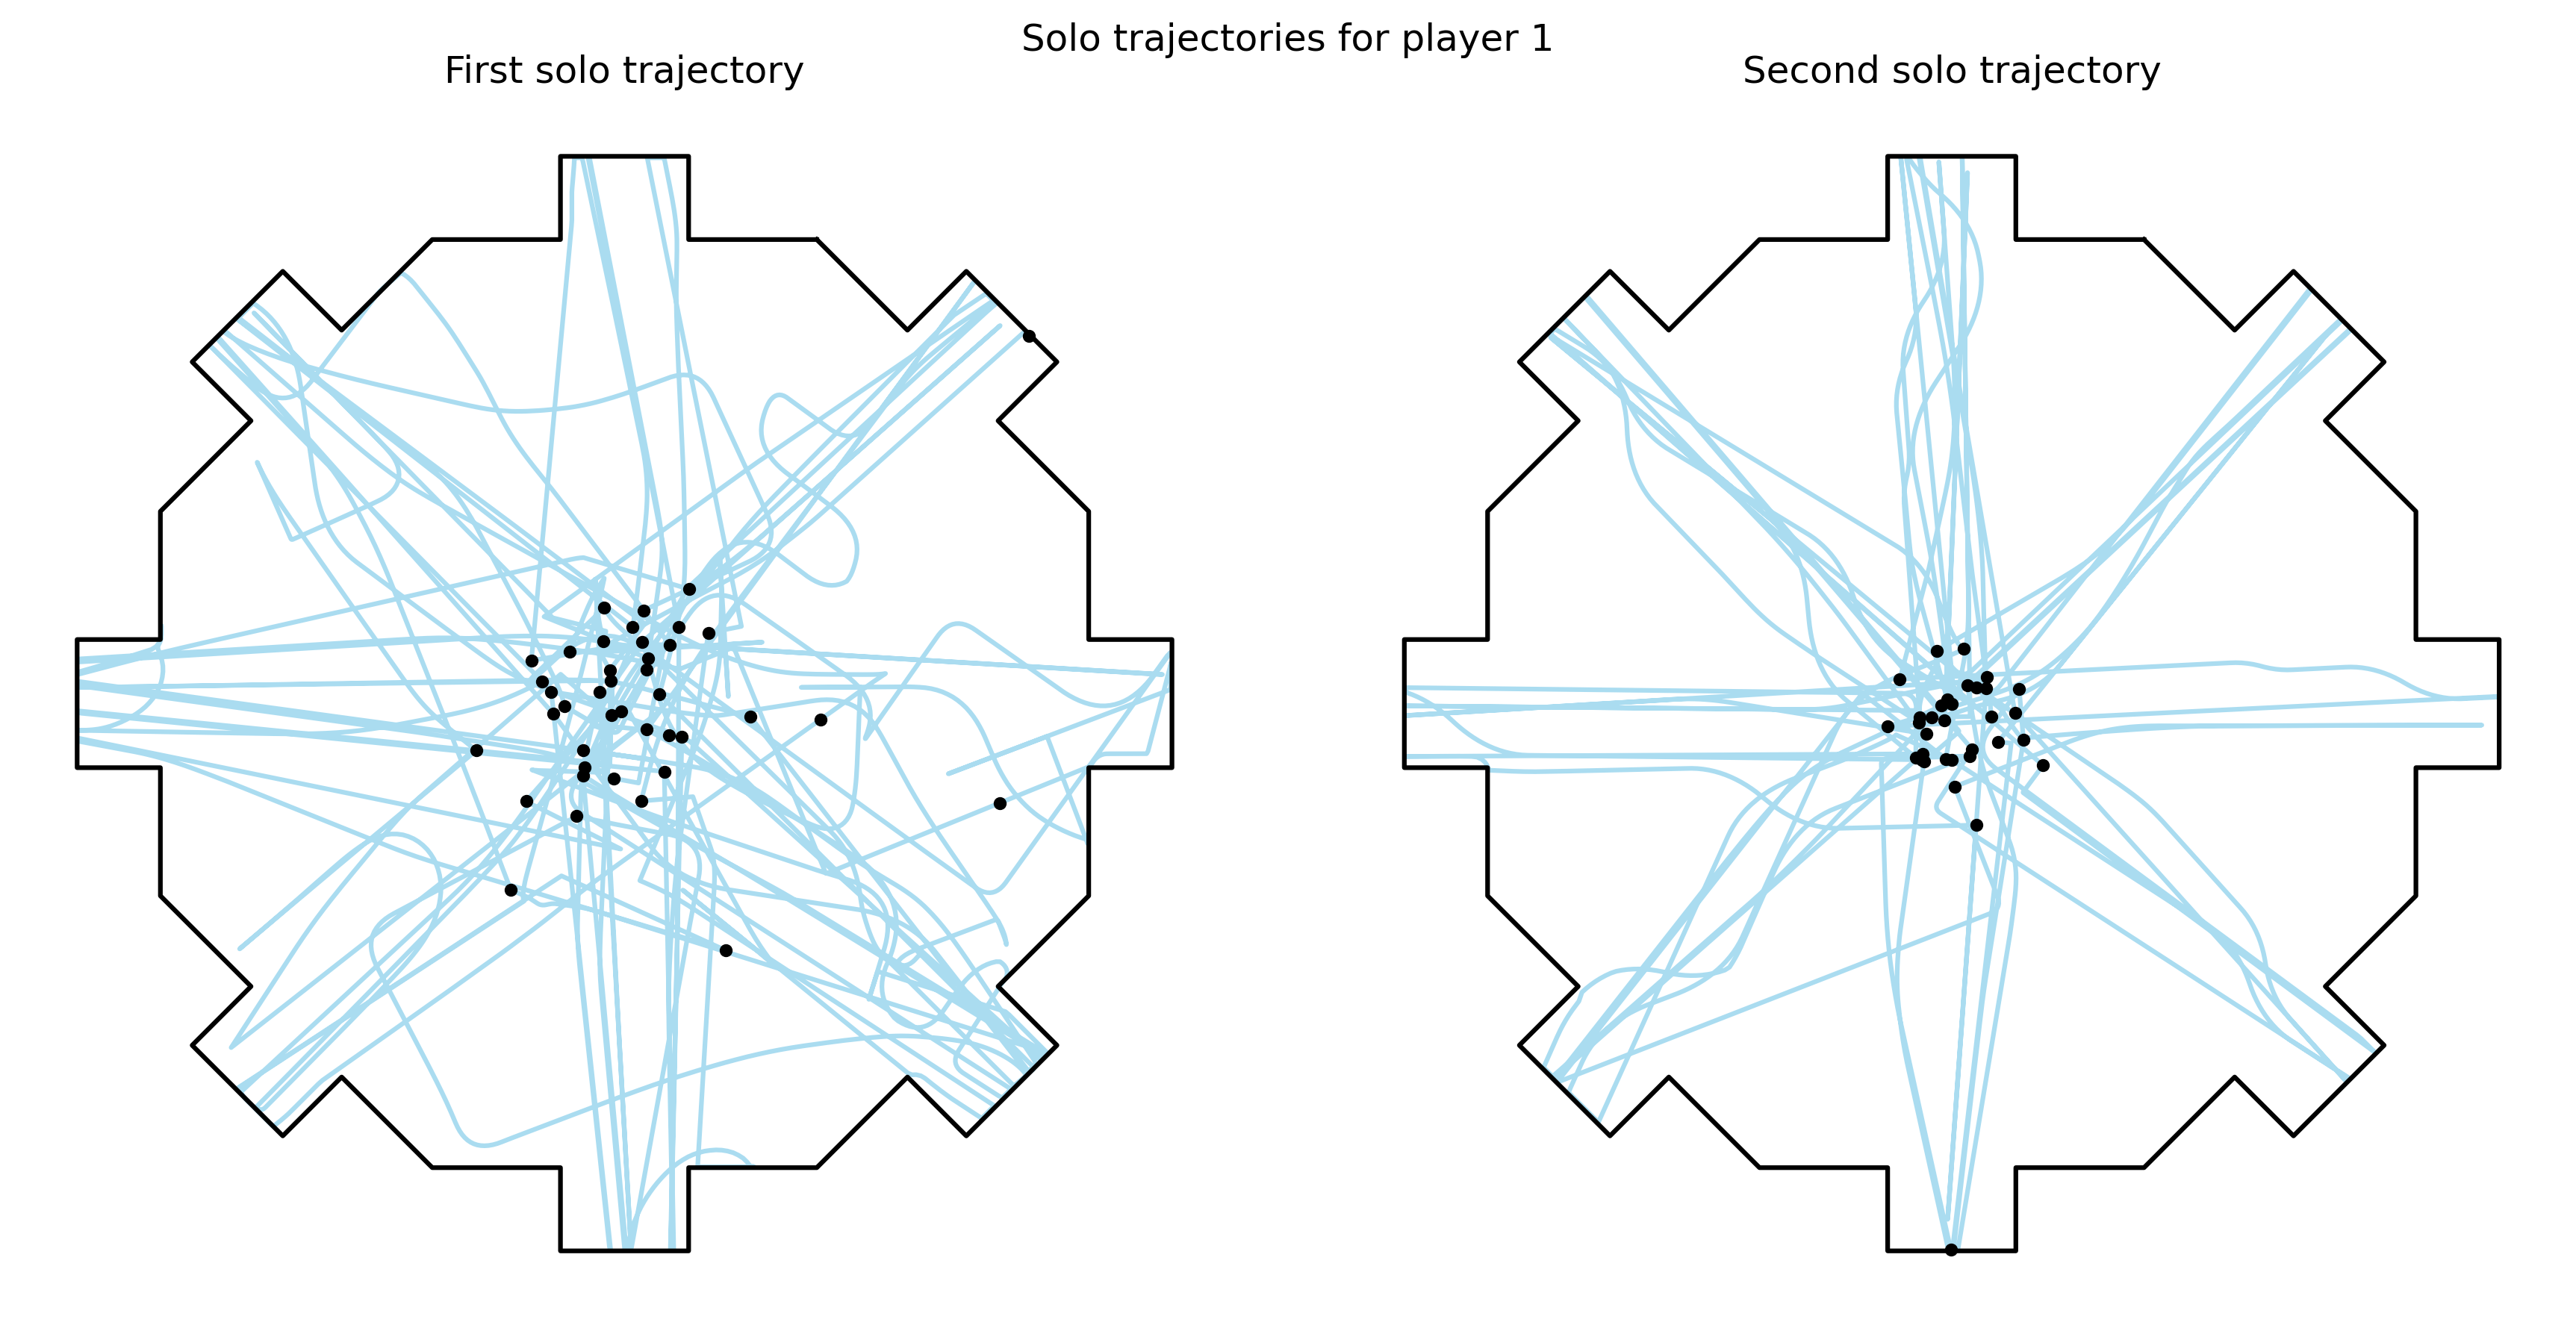

In [64]:
chosen_player = 0

fig, axs = plt.subplots(1,2,figsize=(10*1.2,5*1.2))

axs[0] = plot_trajectory.plot_session_trajectory(axs[0], dfs_solo[0], alpha=0.7)
axs[0] = plot_trajectory.mark_session_slice_onsets(axs[0], dfs_solo[0], chosen_player=chosen_player)
axs[0] = plot_octagon.plot_octagon(axs[0])
for spine in axs[0].spines.values():
    spine.set_visible(False)
axs[0].tick_params(left=False, bottom=False)  # Turn off major ticks
axs[0].set_xticklabels([])
axs[0].set_yticklabels([])
axs[0].set_title("First solo trajectory")

axs[1] = plot_trajectory.plot_session_trajectory(axs[1], dfs_solo[1], alpha=0.7)
axs[0] = plot_trajectory.mark_session_slice_onsets(axs[1], dfs_solo[1], chosen_player=chosen_player)
axs[1] = plot_octagon.plot_octagon(axs[1])
for spine in axs[1].spines.values():
    spine.set_visible(False)
axs[1].tick_params(left=False, bottom=False)  # Turn off major ticks
axs[1].set_xticklabels([])
axs[1].set_yticklabels([])
axs[1].set_title("Second solo trajectory")
plt.suptitle(f"Solo trajectories for player {chosen_player+1}")
plt.tight_layout()

plt.show()


In [65]:
chosen_player*2

0

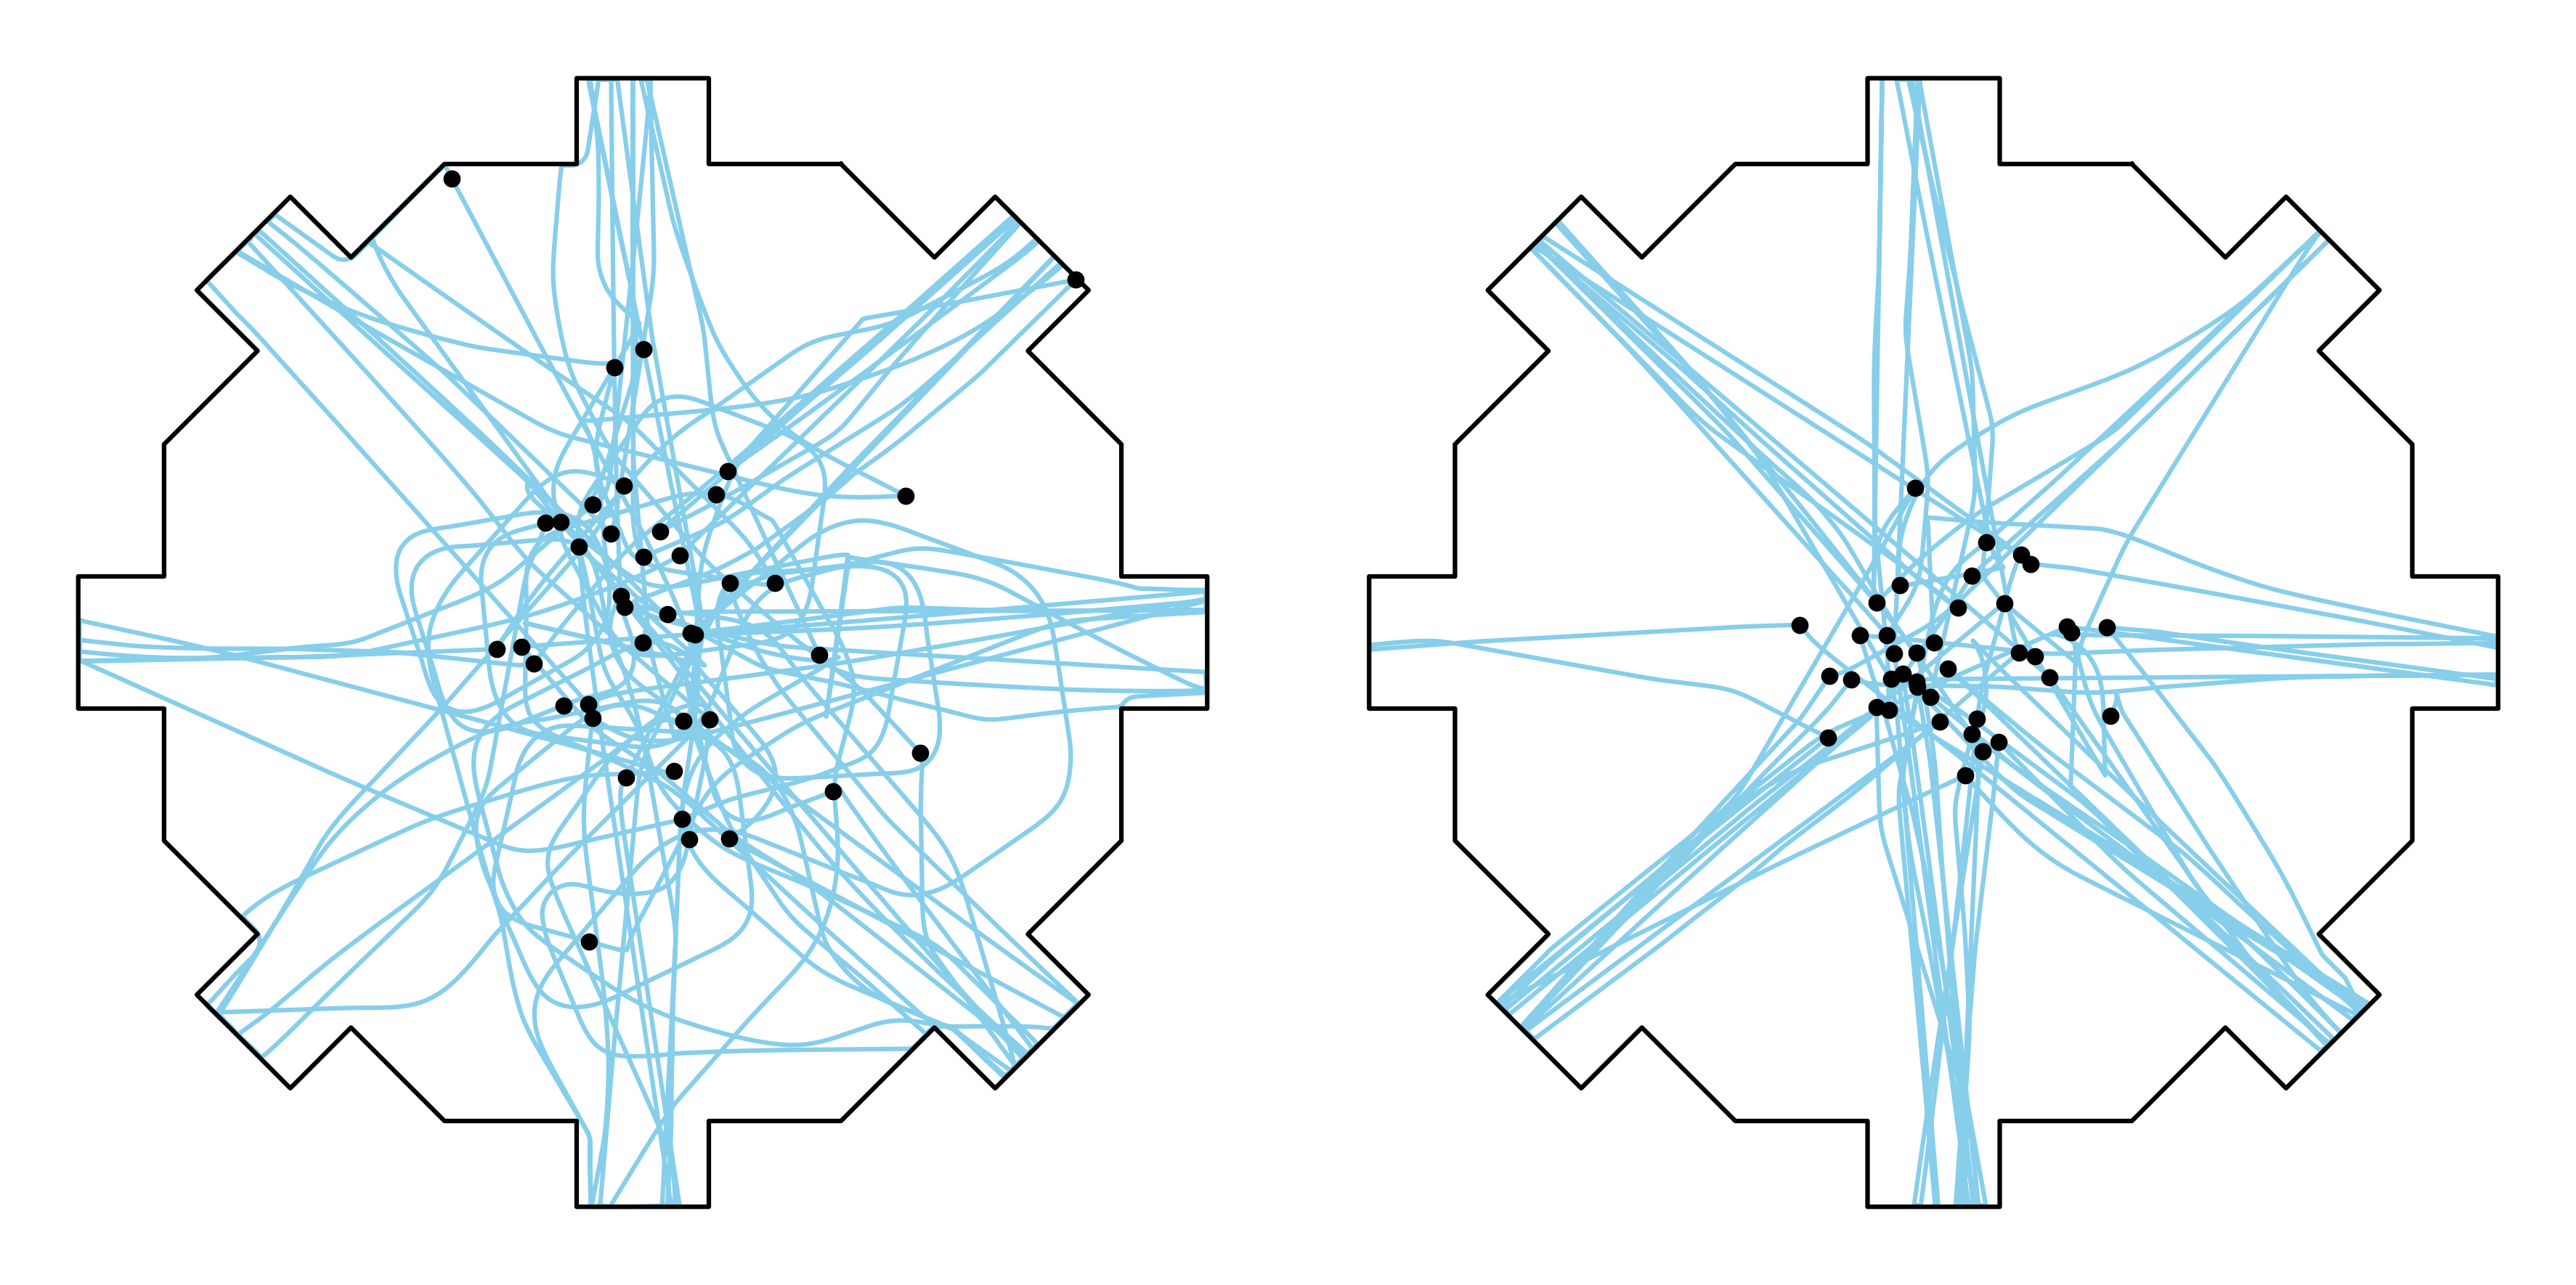

In [66]:
chosen_player = 1

fig, axs = plt.subplots(1,2,figsize=(10*1.2,5*1.2))

axs[0] = plot_trajectory.plot_session_trajectory(axs[0], dfs_solo[chosen_player*2], alpha=1, titles=False)
axs[0] = plot_trajectory.mark_session_slice_onsets(axs[0], dfs_solo[chosen_player*2], chosen_player=0, s=22)
axs[0] = plot_octagon.plot_octagon(axs[0])
for spine in axs[0].spines.values():
    spine.set_visible(False)
axs[0].tick_params(left=False, bottom=False)  # Turn off major ticks
axs[0].set_xticklabels([])
axs[0].set_yticklabels([])
# axs[0].set_title("First Solo session trajectory")

axs[0].title.set_size(22)

# axs[0].set_title("First solo trajectory", fontsize=18)

axs[1] = plot_trajectory.plot_session_trajectory(axs[1], dfs_solo[chosen_player*2+1], alpha=1, titles=False)
axs[0] = plot_trajectory.mark_session_slice_onsets(axs[1], dfs_solo[chosen_player*2+1], chosen_player=0, s=22)
axs[1] = plot_octagon.plot_octagon(axs[1])
for spine in axs[1].spines.values():
    spine.set_visible(False)
axs[1].tick_params(left=False, bottom=False)  # Turn off major ticks
axs[1].set_xticklabels([])
axs[1].set_yticklabels([])
# axs[1].set_title("Second Solo session trajectory")

axs[1].title.set_size(22)

# axs[1].set_title("Second solo trajectory", fontsize=18)
# plt.suptitle(f"Solo trajectories for player {chosen_player+1}", fontsize=24)
plt.tight_layout()

plt.show()


### plot probability choose high

In [67]:
(probability_choose_high_social_array,
probability_choose_high_solo_array,
probability_choose_high_solo_array_first_session,
probability_choose_high_solo_array_second_session) = plot_probability_chose_wall.get_probability_chose_high_solo_social_all_sessions_df(trials_lists_solo,
                                                                                                                                        [trials_list_social],
                                                                                                                                        wall_sep=None,
                                                                                                                                        trial_type=globals.HIGH_LOW,
                                                                                                                                        cut_solo_trials=5)  

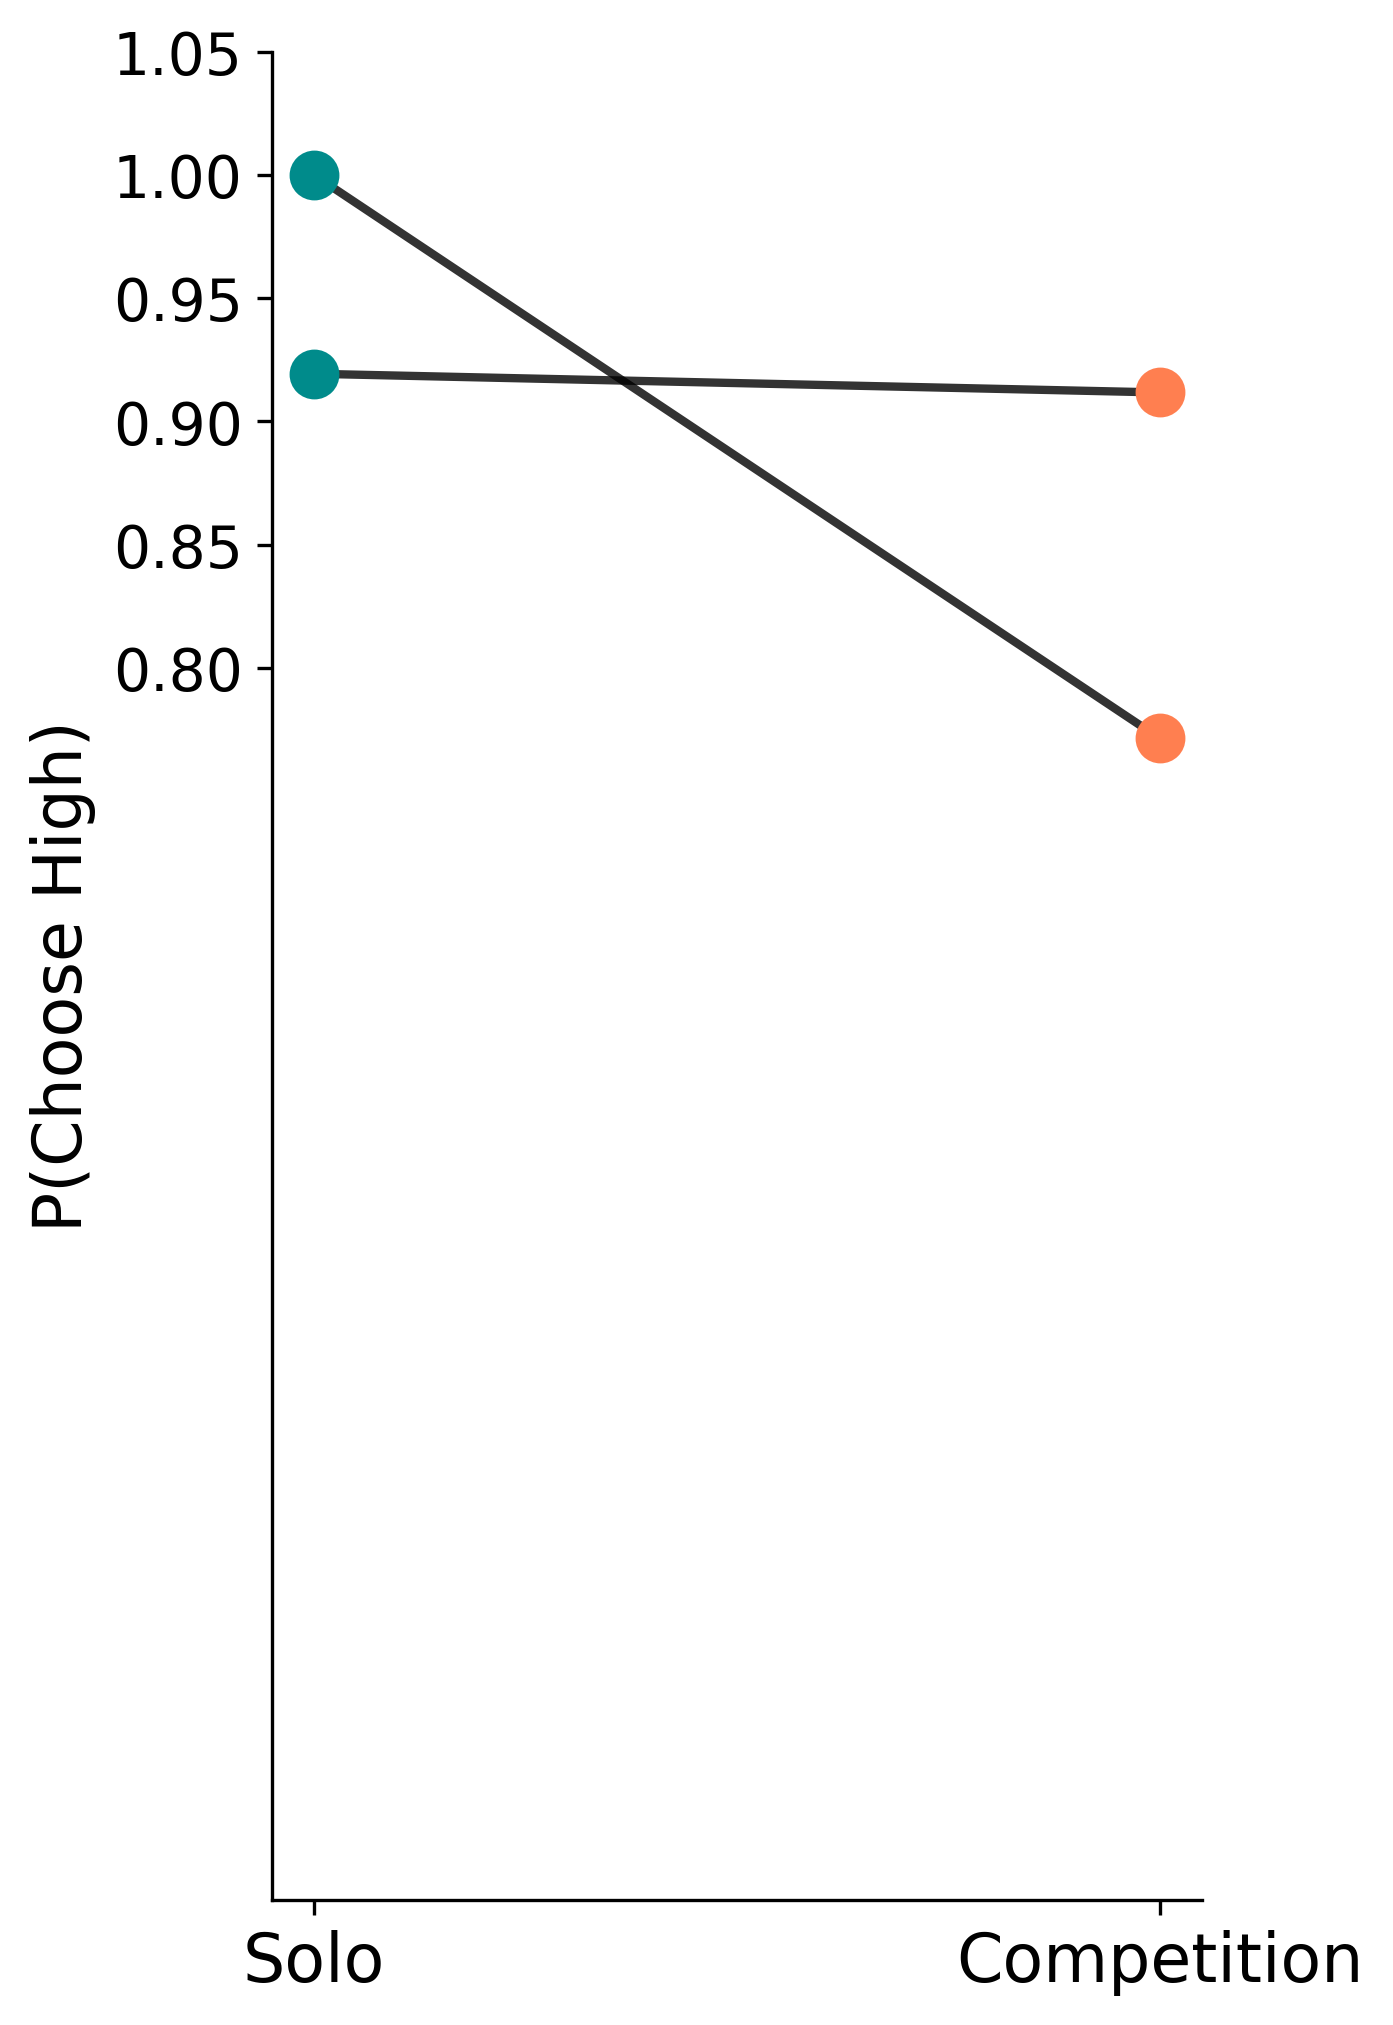

In [68]:
plot_probability_chose_wall.plot_probability_choose_high_solo_social(probability_choose_high_social_array, probability_choose_high_solo_array, black_lines=False)

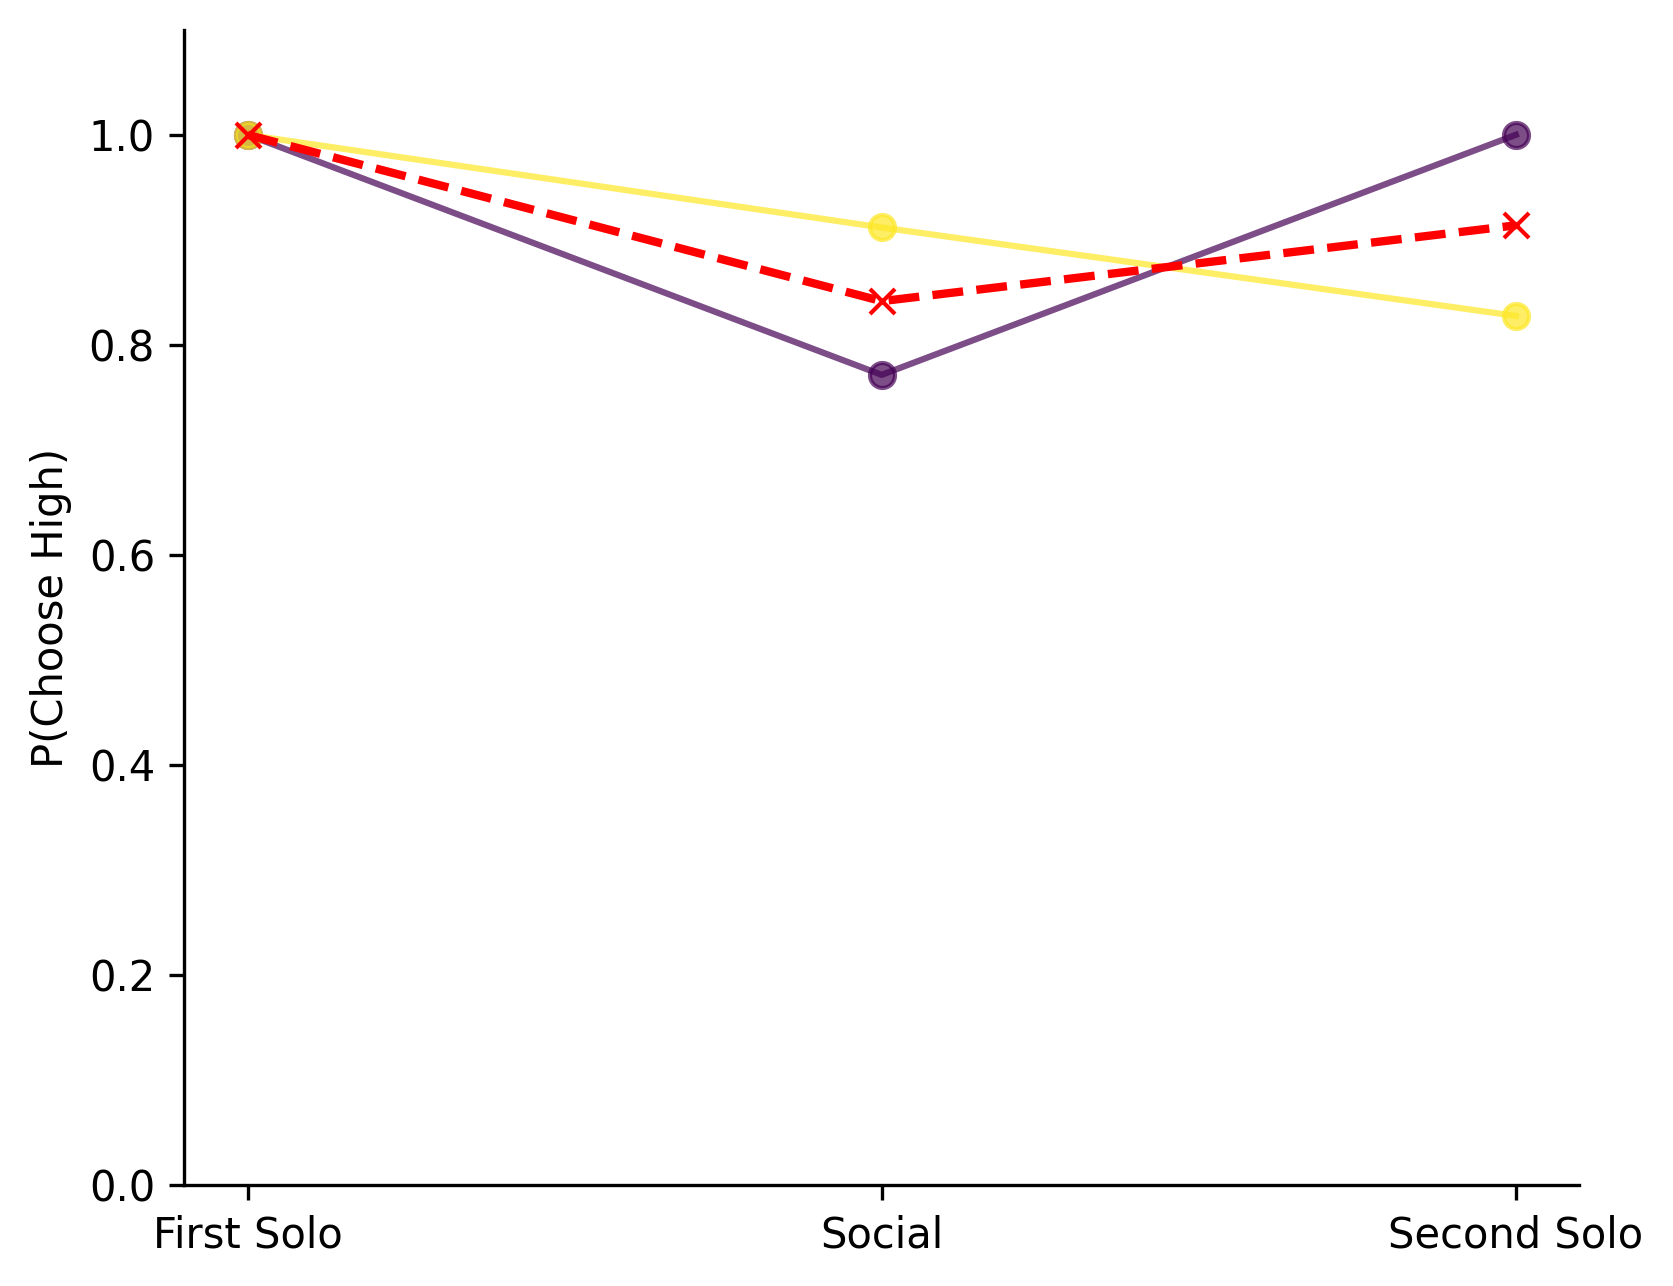

In [69]:
plot_probability_chose_wall.plot_probability_choose_high_solo_social(probability_choose_high_social_array, probability_choose_high_solo_array_first_session,
                                                                     probability_choose_high_solo_array_second_session, black_lines=False)

In [70]:
(probability_first_wall_chosen_when_low_array,
  _,
  probability_first_wall_chosen_array)  = wall_visibility_and_choice.probability_first_wall_chosen_and_low_multiple_sessions_social([trials_list_social])

(probability_first_wall_chosen_when_high_array,
  _,
  probability_first_wall_chosen_array)  = wall_visibility_and_choice.probability_first_wall_chosen_and_low_multiple_sessions_social([trials_list_social], reverse=True)

wall_choice_probabilities = [probability_first_wall_chosen_array, probability_first_wall_chosen_when_low_array, probability_first_wall_chosen_when_high_array] 
wall_choice_labels = ['First Wall Seen', 'First Wall Seen (Low)', 'First Wall Seen (High)']


trial list index: 0
player num: 0
 player wall choice this trial: nan
not confident in loser's choice, or inferred choice not used
 first_vis_wall_chosen: nan
 this_player_this_trial_first_visible_wall_chosen: nan
 player wall choice this trial: 4.0
 this_player_this_trial_first_visible_wall_chosen: True
 player wall choice this trial: nan
not confident in loser's choice, or inferred choice not used
 first_vis_wall_chosen: nan
 this_player_this_trial_first_visible_wall_chosen: nan
 player wall choice this trial: 3.0
 this_player_this_trial_first_visible_wall_chosen: True
 player wall choice this trial: nan
not confident in loser's choice, or inferred choice not used
 first_vis_wall_chosen: nan
 this_player_this_trial_first_visible_wall_chosen: nan
 player wall choice this trial: nan
not confident in loser's choice, or inferred choice not used
 first_vis_wall_chosen: nan
 this_player_this_trial_first_visible_wall_chosen: nan
 player wall choice this trial: nan
not confident in loser's c

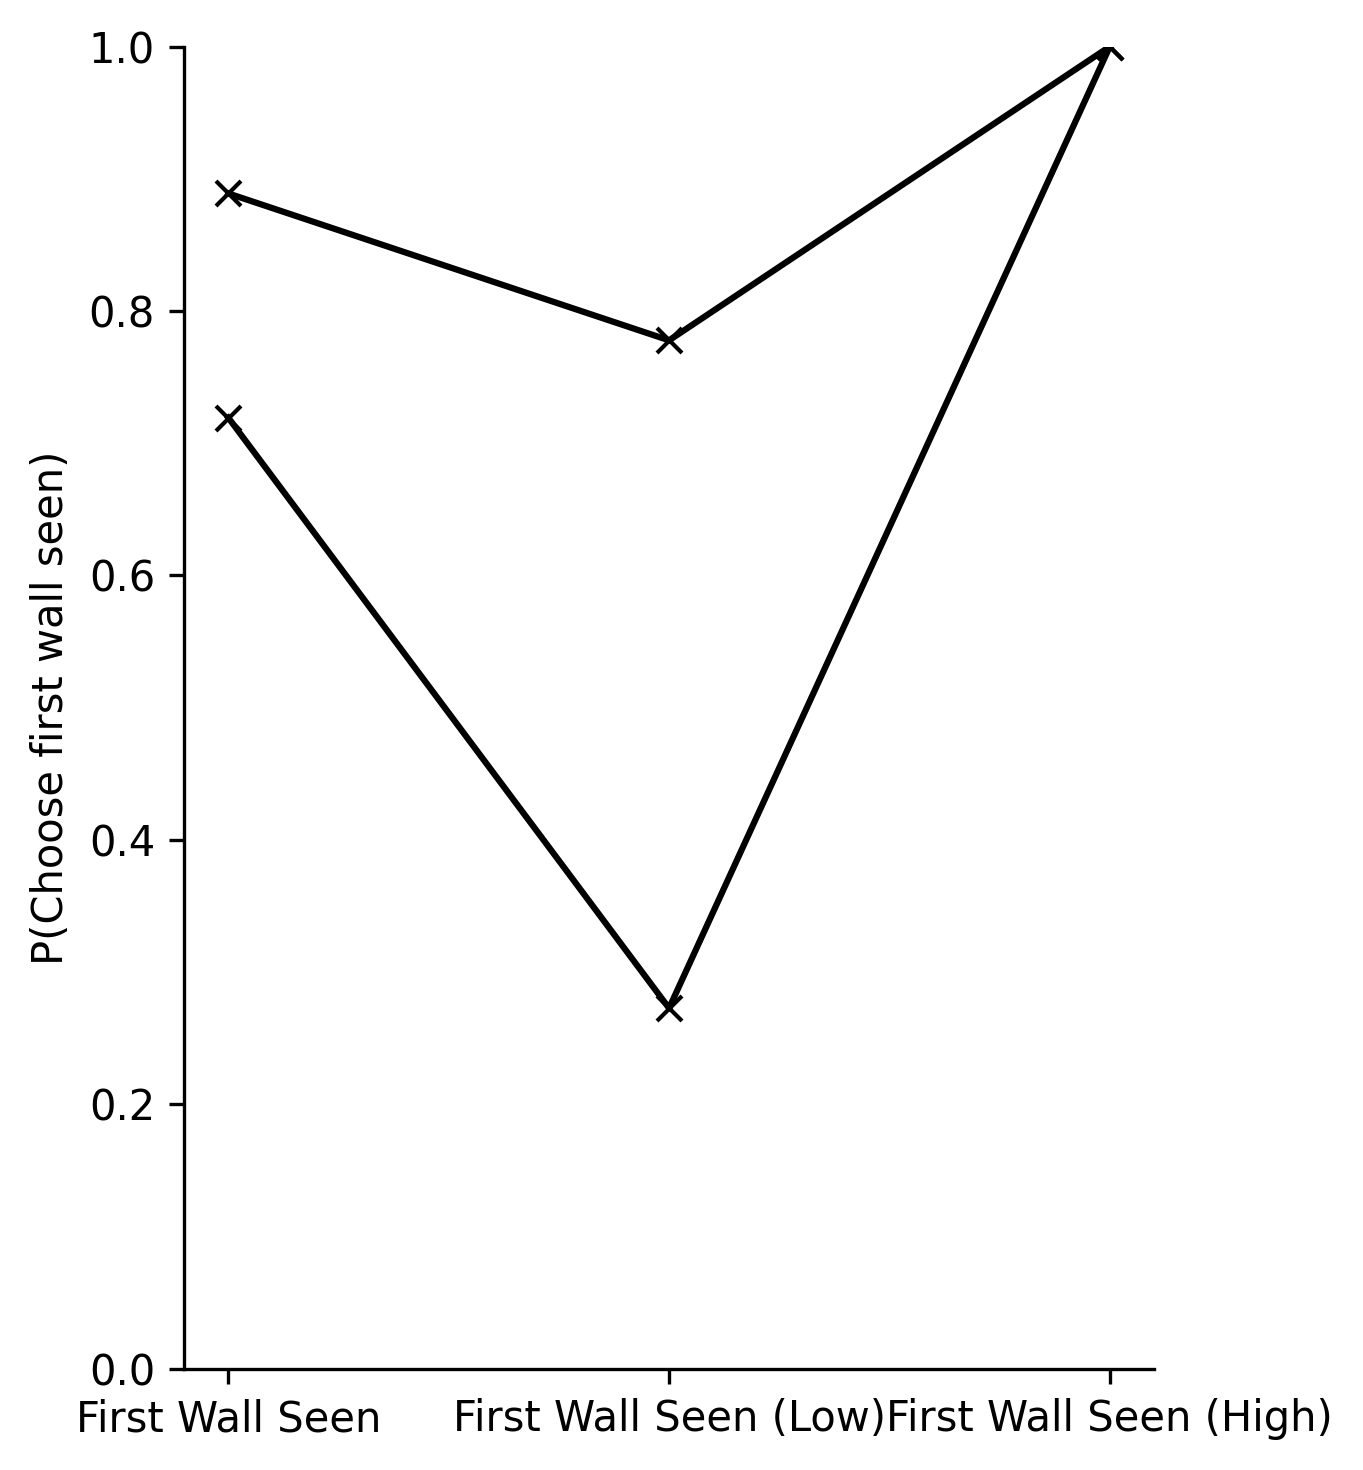

In [71]:
# Plot
plt.figure(figsize=(4, 5))

for i in range(1):
    plt.plot(np.arange(len(wall_choice_labels)), [wall_choice_probabilities[0][i], wall_choice_probabilities[1][i], wall_choice_probabilities[2][i]], color='k', linestyle='-', marker='x')


# plt.title("Probability of Choosing First Wall Seen vs. First Wall Seen (Low)")
plt.ylabel("P(Choose first wall seen)")
plt.xlabel("")
plt.ylim(0.0, 1)  # Set y-axis limits for probabilities
plt.gca().set_aspect(3)
plt.tight_layout()

# Set x-ticks to correspond to categorical labels
plt.xticks(np.arange(len(wall_choice_labels)), wall_choice_labels)

# Remove top and bottom spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()


## Upgrade fig5 - KirtanChristopher session

### Plot half-session trajectories

In [72]:
titles=False

In [73]:
social_first_half = df_social[df_social['data.trialNum'] < 60]
social_second_half = df_social[df_social['data.trialNum'] >= 60]

In [74]:
social_first_half['data.trialNum'].tail()

31833    59.0
31834    59.0
31835    59.0
31836    59.0
31837    59.0
Name: data.trialNum, dtype: float64

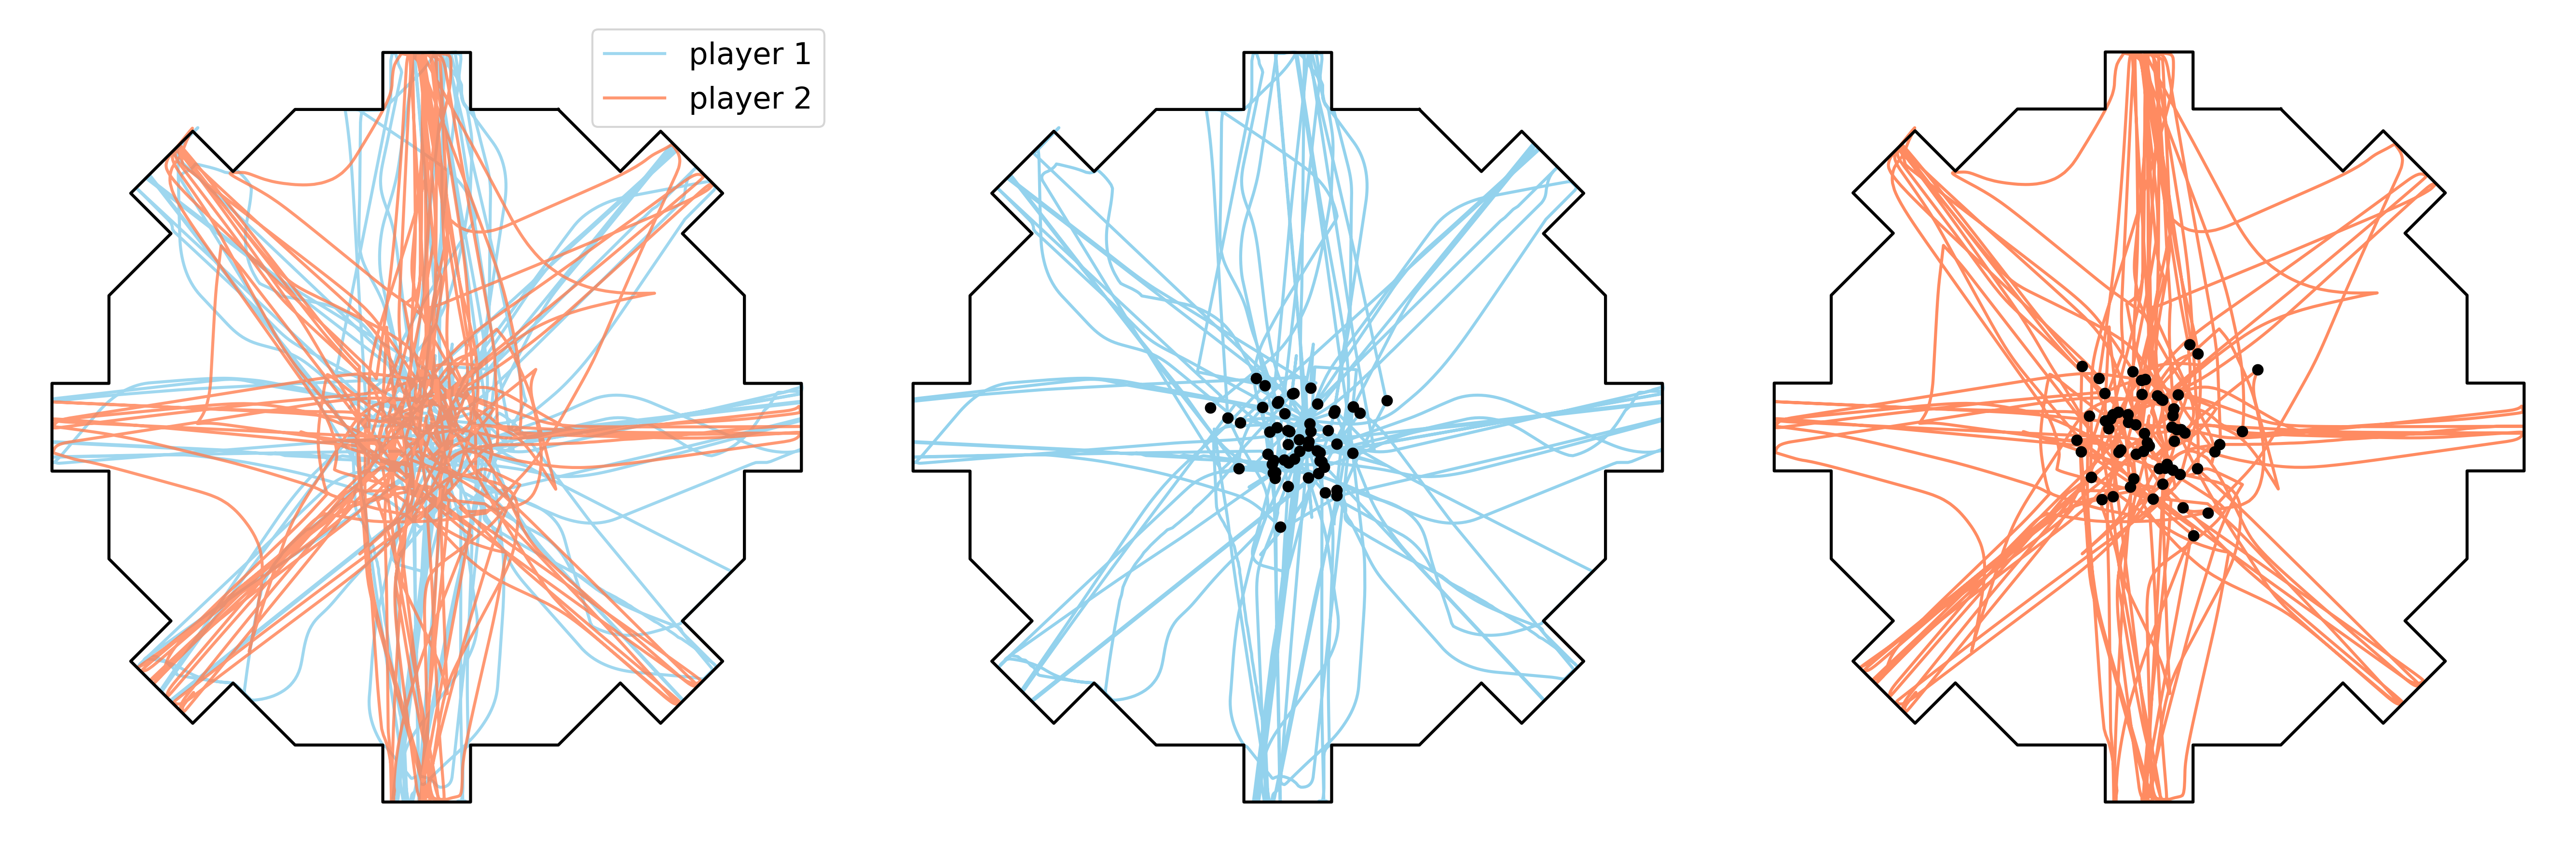

In [75]:
# plot first half session trajectory

fig, axs = plt.subplots(1,3,figsize=(15*1.2,5*1.2))

axs[0] = plot_trajectory.plot_session_trajectory(axs[0], social_first_half, titles=titles, alpha=0.8)
axs[0] = plot_octagon.plot_octagon(axs[0])
for spine in axs[0].spines.values():
    spine.set_visible(False)
axs[0].tick_params(left=False, bottom=False)  # Turn off major ticks
axs[0].set_xticklabels([])
axs[0].set_yticklabels([])

axs[1] = plot_trajectory.plot_session_trajectory(axs[1], social_first_half, chosen_player=0, titles=titles)
axs[1] = plot_trajectory.mark_session_slice_onsets(axs[1], social_first_half, chosen_player=0, s=22)
axs[1] = plot_octagon.plot_octagon(axs[1])
for spine in axs[1].spines.values():
    spine.set_visible(False)
axs[1].tick_params(left=False, bottom=False)  # Turn off major ticks
axs[1].set_xticklabels([])
axs[1].set_yticklabels([])

axs[2] = plot_trajectory.plot_session_trajectory(axs[2], social_first_half, chosen_player=1,titles=titles)
axs[2] = plot_octagon.plot_octagon(axs[2])
axs[2] = plot_trajectory.mark_session_slice_onsets(axs[2], social_first_half, chosen_player=1, s=22)

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().tick_params(left=False, bottom=False)  # Turn off major ticks
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])

axs[0].title.set_size(22)
axs[1].title.set_size(22)
axs[2].title.set_size(22)



axs[0].legend(prop={'size': 15})

plt.tight_layout()

plt.show()


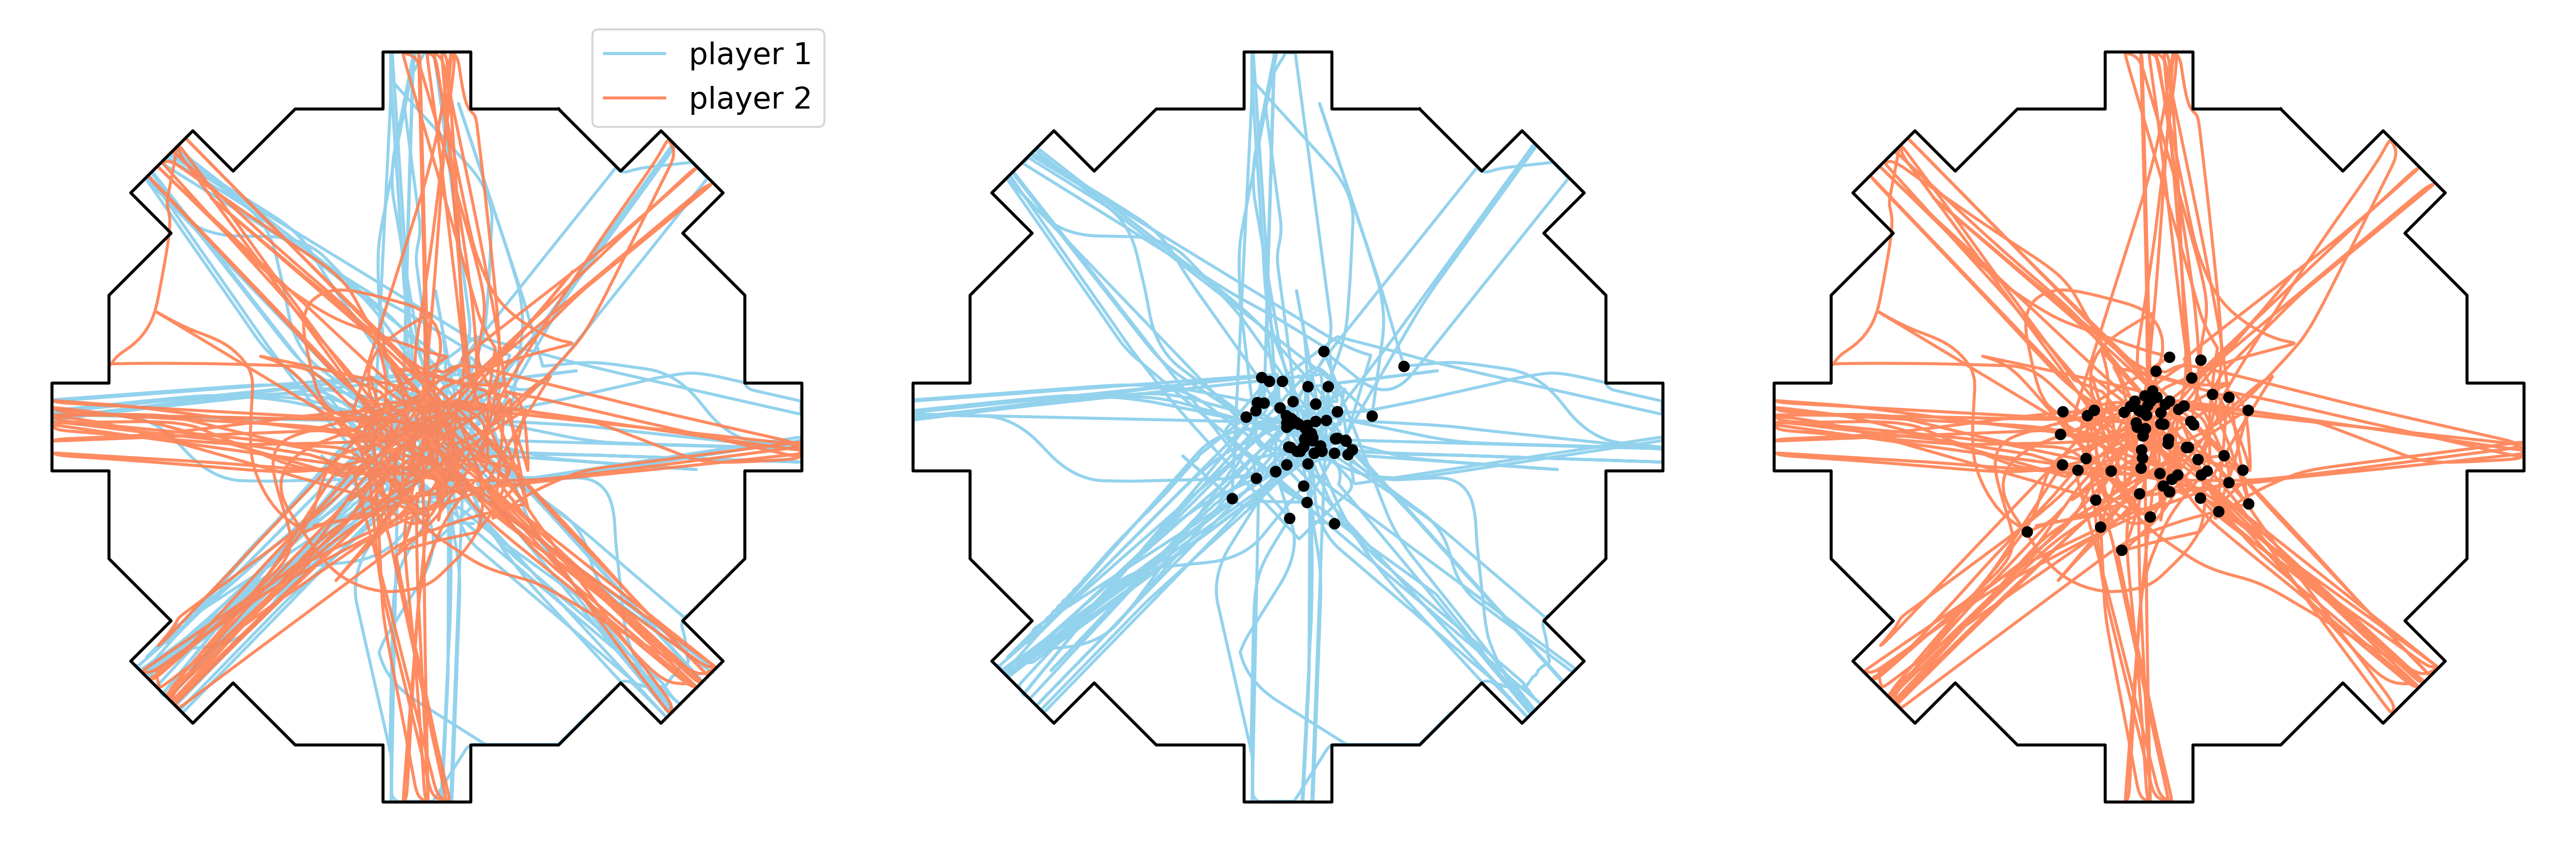

In [76]:
# plot second half session trajectory

fig, axs = plt.subplots(1,3,figsize=(15*1.2,5*1.2))

axs[0] = plot_trajectory.plot_session_trajectory(axs[0], social_second_half, titles=titles)
axs[0] = plot_octagon.plot_octagon(axs[0])
for spine in axs[0].spines.values():
    spine.set_visible(False)
axs[0].tick_params(left=False, bottom=False)  # Turn off major ticks
axs[0].set_xticklabels([])
axs[0].set_yticklabels([])

axs[1] = plot_trajectory.plot_session_trajectory(axs[1], social_second_half, chosen_player=0, titles=titles)
axs[1] = plot_trajectory.mark_session_slice_onsets(axs[1], social_second_half, chosen_player=0, s=22)
axs[1] = plot_octagon.plot_octagon(axs[1])
for spine in axs[1].spines.values():
    spine.set_visible(False)
axs[1].tick_params(left=False, bottom=False)  # Turn off major ticks
axs[1].set_xticklabels([])
axs[1].set_yticklabels([])

axs[2] = plot_trajectory.plot_session_trajectory(axs[2], social_second_half, chosen_player=1, titles=titles)
axs[2] = plot_octagon.plot_octagon(axs[2])
axs[2] = plot_trajectory.mark_session_slice_onsets(axs[2], social_second_half, chosen_player=1, s=22)

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().tick_params(left=False, bottom=False)  # Turn off major ticks
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])

axs[0].title.set_size(22)
axs[1].title.set_size(22)
axs[2].title.set_size(22)



axs[0].legend(prop={'size': 15})

plt.tight_layout()

plt.show()


### P(High) and Score change throughout

In [77]:
first_half_trials_list = [trial for trial in trials_list_social if trial['data.trialNum'].iloc[0] < 60]
second_half_trials_list = [trial for trial in trials_list_social if trial['data.trialNum'].iloc[0] >= 60]

In [78]:
first_half_p_high_p0 = plot_probability_chose_wall.get_probability_chose_high_social(first_half_trials_list, player_id=0)
first_half_p_high_p1 = plot_probability_chose_wall.get_probability_chose_high_social(first_half_trials_list, player_id=1)

second_half_p_high_p0 = plot_probability_chose_wall.get_probability_chose_high_social(second_half_trials_list, player_id=0)
second_half_p_high_p1 = plot_probability_chose_wall.get_probability_chose_high_social(second_half_trials_list, player_id=1)

d:\tom\documents\swc\repos\octagon_analysis\trajectory_analysis\trajectory_vectors.py:321: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
d:\tom\documents\swc\repos\octagon_analysis\analysis\loser_inferred_choice.py:47: RuntimeWarning: Mean of empty slice
  return np.argmax(np.nanmean(cosine_similarity_trajectory, axis=1))
d:\tom\documents\swc\repos\octagon_analysis\analysis\loser_inferred_choice.py:149: RuntimeWarning: Mean of empty slice
  highest_alignment_val = np.max(np.nanmean(cosine_similarity_trajectory, axis=1))


In [79]:
first_half_p_high_p1, second_half_p_high_p1

(0.8181818181818182, 0.8275862068965517)

In [80]:
def get_probability_win_social(trial_list, player_id,
                                      inferred_choice=False):

    original_indices = np.arange(len(trial_list))

    # filter for player retrievable choice trials (wins)
    (trial_list_filtered_wins,
     trial_indices_choice_retrievable) = trial_list_filters.filter_trials_retrievable_choice(trial_list,
                                                                           player_id, inferred_choice, original_indices)
    
    # calculate probability of winning in social for this player
    probability_win = plot_probability_chose_wall.calculate_probability_choose_wall(original_indices,
                                                                                            trial_list_filtered_wins)

    return probability_win

In [81]:
def get_probability_chose_high_social(trial_list, player_id,
                                      inferred_choice=False,
                                      given_wall_index=0):


    # filter for player retrievable choice trials
    (trial_list_filtered_choice_retrievable,
     trial_indices_choice_retrievable) = trial_list_filters.filter_trials_retrievable_choice(trial_list,
                                                                           player_id, inferred_choice)
    
    # filter retrievable choice trials for trials where this player chose High
    (trial_list_filtered_chose_high,
    trial_indices_chose_high) = trial_list_filters.filter_trials_player_chose_given_wall(trial_list_filtered_choice_retrievable,
                                                                       player_id,
                                                                       inferred_choice,
                                                                       given_wall_index,
                                                                       original_indices=trial_indices_choice_retrievable)
    
    # calculate probability of choosing High in social for this player
    probability_chose_high = plot_probability_chose_wall.calculate_probability_choose_wall(trial_list_filtered_choice_retrievable, trial_list_filtered_chose_high)

    return probability_chose_high, trial_indices_choice_retrievable,  trial_indices_chose_high

In [82]:
get_probability_win_social(first_half_trials_list, player_id=0), get_probability_win_social(second_half_trials_list, player_id=0)

(0.3389830508474576, 0.4142857142857143)

In [83]:
get_probability_win_social(first_half_trials_list, player_id=1), get_probability_win_social(second_half_trials_list, player_id=1)

(0.6610169491525424, 0.5857142857142857)

#### Bar chart

In [84]:
(p_high_wins_only_first_half_p0, indices_first_half_p0,
  indices_first_half_p0_choice) = get_probability_chose_high_social(first_half_trials_list, player_id=0)
(p_high_wins_only_second_half_p0, indices_second_half_p0,
  indices_second_half_p0_choice) = get_probability_chose_high_social(second_half_trials_list, player_id=0)
p_high_wins_only_first_half_p0, p_high_wins_only_second_half_p0

(0.6, 0.6551724137931034)

In [85]:
(p_high_wins_only_first_half_p1, indices_first_half_p1,
  indices_first_half_p1_choice) = get_probability_chose_high_social(first_half_trials_list, player_id=1)
(p_high_wins_only_second_half_p1, indices_second_half_p1,
  indices_second_half_p1_choice) = get_probability_chose_high_social(second_half_trials_list, player_id=1)
p_high_wins_only_first_half_p1, p_high_wins_only_second_half_p1

(0.8717948717948718, 0.8292682926829268)

In [86]:
(p_high_wins_p0, indices_p0,
  indices_p0_choice) = get_probability_chose_high_social(trials_list_social, player_id=0)

(p_high_wins_p1, indices_p1,
  indices_p1_choice) = get_probability_chose_high_social(trials_list_social, player_id=1)


In [87]:
(p_high_wins_only_first_half_p1, indices_first_half_p1,
  indices_first_half_p1_choice) = get_probability_chose_high_social(first_half_trials_list, player_id=1)

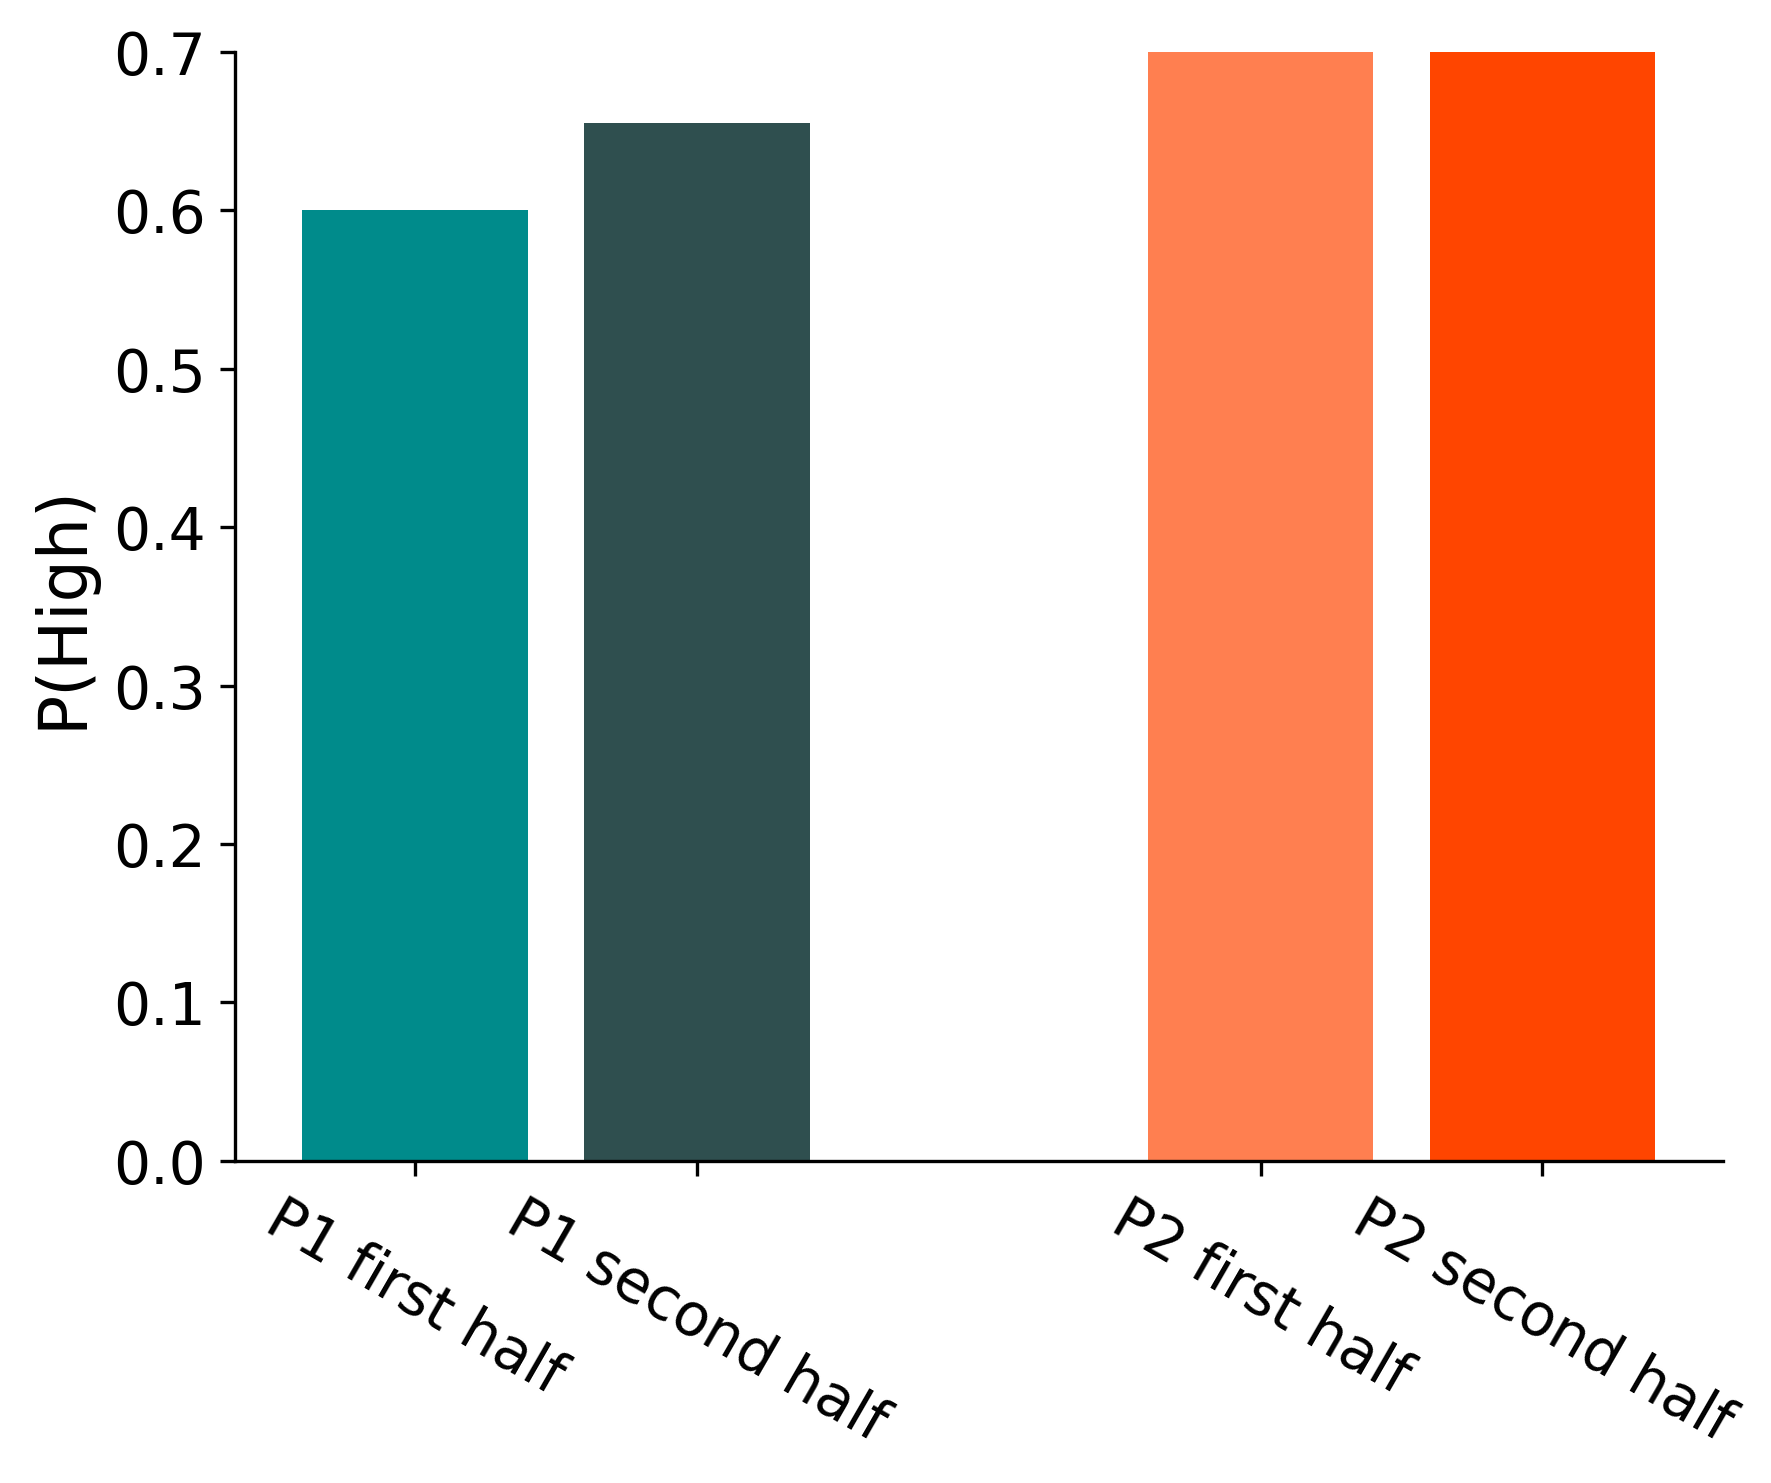

In [ ]:
x = np.array([0.5, 1, 2, 2.5])
width = 0.4
vals = np.array([p_high_wins_only_first_half_p0, p_high_wins_only_first_half_p1,
                 p_high_wins_only_second_half_p0,p_high_wins_only_second_half_p1])
tick_labels = ['P1 first half','P1 second half','P2 first half', 'P2 second half']
colors = ['darkcyan', 'darkslategrey', 'coral', 'orangered']
plt.bar(x, vals, width, color=colors, tick_label=tick_labels)
plt.xticks(rotation=-30)

# Hide the right and top spines
plt.gca().spines[['right', 'top']].set_visible(False)
plt.ylabel('P(High)', fontsize=16)
plt.ylim([0.0, 0.7])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.rcParams['figure.dpi'] = 300

#### bar chart stats
- two proportion z-test
- Not significant for either player
- 
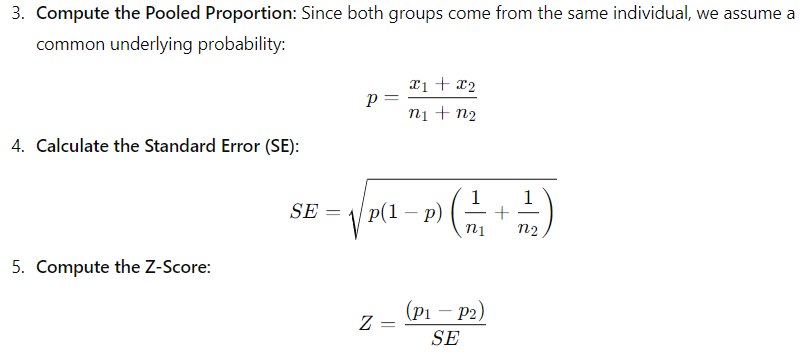

In [89]:
# player0
n1 = np.count_nonzero(indices_first_half_p0)
n2 = np.count_nonzero(indices_second_half_p0)
p = p_high_wins_p0
p1 = p_high_wins_only_first_half_p0
p2 = p_high_wins_only_second_half_p0

std_error = p*(1-p)*((1/n1) + (1/n2))
std_error = np.sqrt(std_error)

zscore = (p1 - p2)/std_error

In [90]:
n1,n2,p,p1,p2,std_error,zscore

(20,
 28,
 0.6326530612244898,
 0.6,
 0.6551724137931034,
 np.float64(0.14113919128124297),
 np.float64(-0.39090782150765885))

In [91]:
norm.cdf(zscore)

np.float64(0.34793268617741363)

In [92]:
# player0
n1 = np.count_nonzero(indices_first_half_p1)
n2 = np.count_nonzero(indices_second_half_p1)
p = p_high_wins_p0
p1 = p_high_wins_only_first_half_p1
p2 = p_high_wins_only_second_half_p1

std_error = p*(1-p)*((1/n1) + (1/n2))
std_error = np.sqrt(std_error)

zscore = (p1 - p2)/std_error

In [93]:
n1,n2,p,p1,p2,std_error,zscore

(38,
 41,
 0.6326530612244898,
 0.8717948717948718,
 0.8292682926829268,
 np.float64(0.10855525164099986),
 np.float64(0.3917505460959505))

In [94]:
norm.cdf(zscore)

np.float64(0.6523787306752725)

#### Line graph

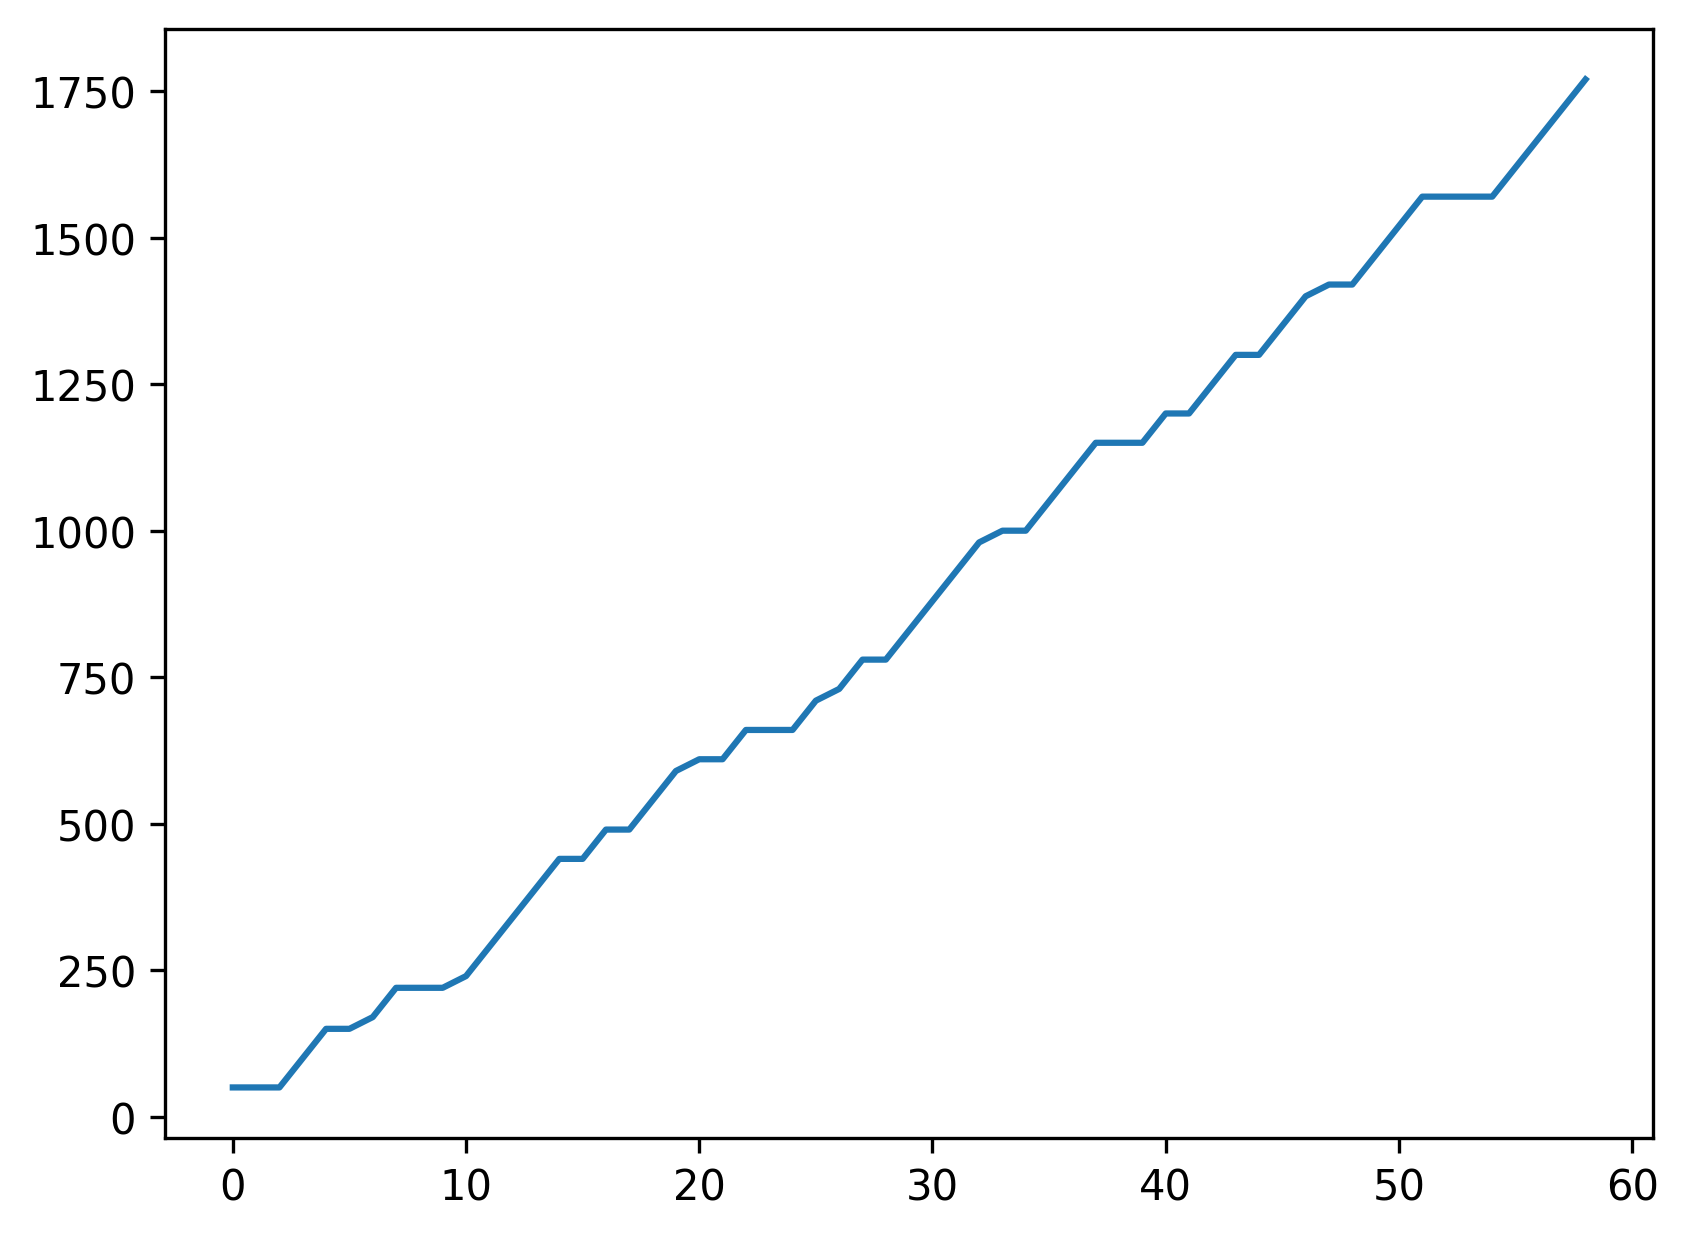

In [95]:
total_score_unprocessed = social_first_half['data.playerScores.1']
total_score = total_score_unprocessed[~np.isnan(total_score_unprocessed)].values[:60]
total_score_first_half_p1 = total_score
plt.plot(total_score_first_half_p1)

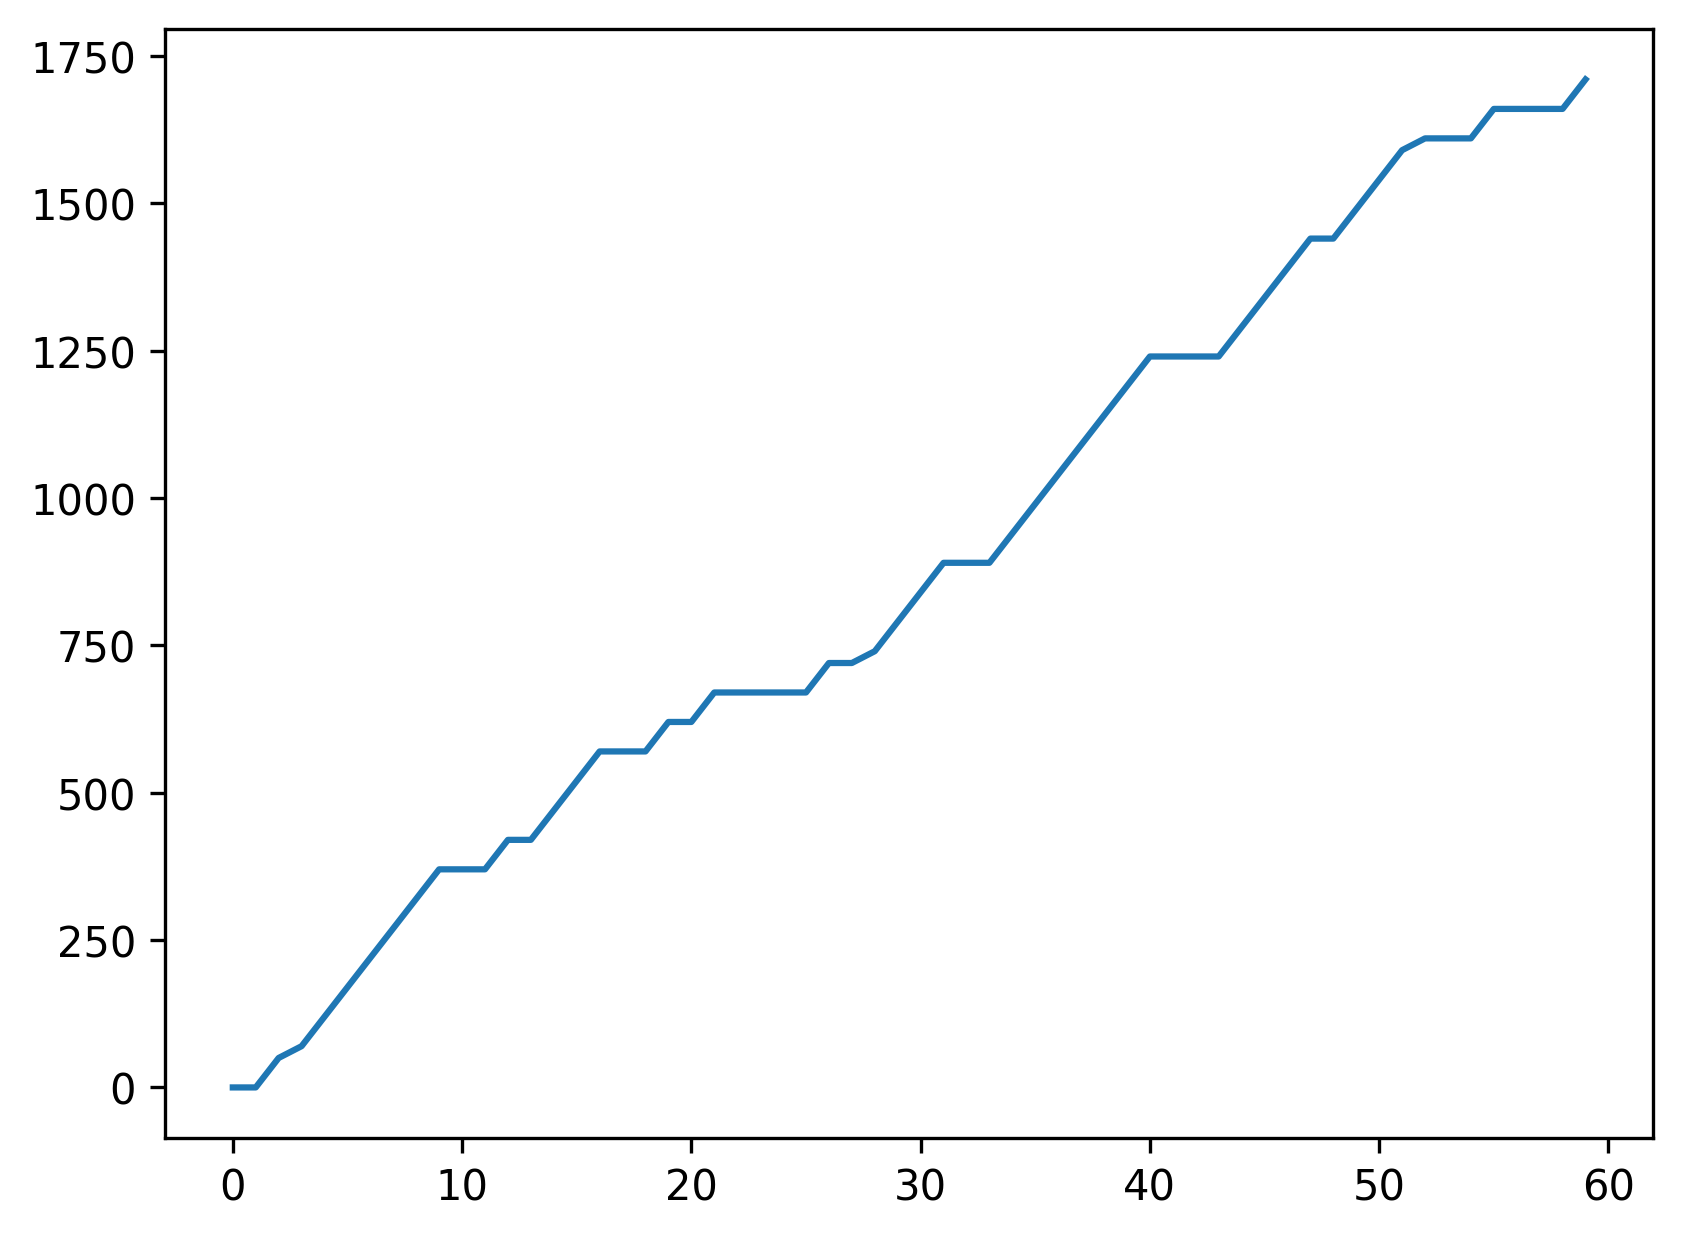

In [96]:
total_score_unprocessed = social_second_half['data.playerScores.1']
total_score = total_score_unprocessed[~np.isnan(total_score_unprocessed)].values[:60]
total_score = total_score - total_score[0]
total_score_second_half_p1 = total_score
plt.plot(total_score_second_half_p1)


In [97]:
total_score_unprocessed[~np.isnan(total_score_unprocessed)].values

array([1770., 1770., 1820., 1840., 1890., 1940., 1990., 2040., 2090.,
       2140., 2140., 2140., 2190., 2190., 2240., 2290., 2340., 2340.,
       2340., 2390., 2390., 2440., 2440., 2440., 2440., 2440., 2490.,
       2490., 2510., 2560., 2610., 2660., 2660., 2660., 2710., 2760.,
       2810., 2860., 2910., 2960., 3010., 3010., 3010., 3010., 3060.,
       3110., 3160., 3210., 3210., 3260., 3310., 3360., 3380., 3380.,
       3380., 3430., 3430., 3430., 3430., 3480., 3530., 3530., 3530.,
       3530., 3530., 3580., 3580., 3630., 3680., 3700.])

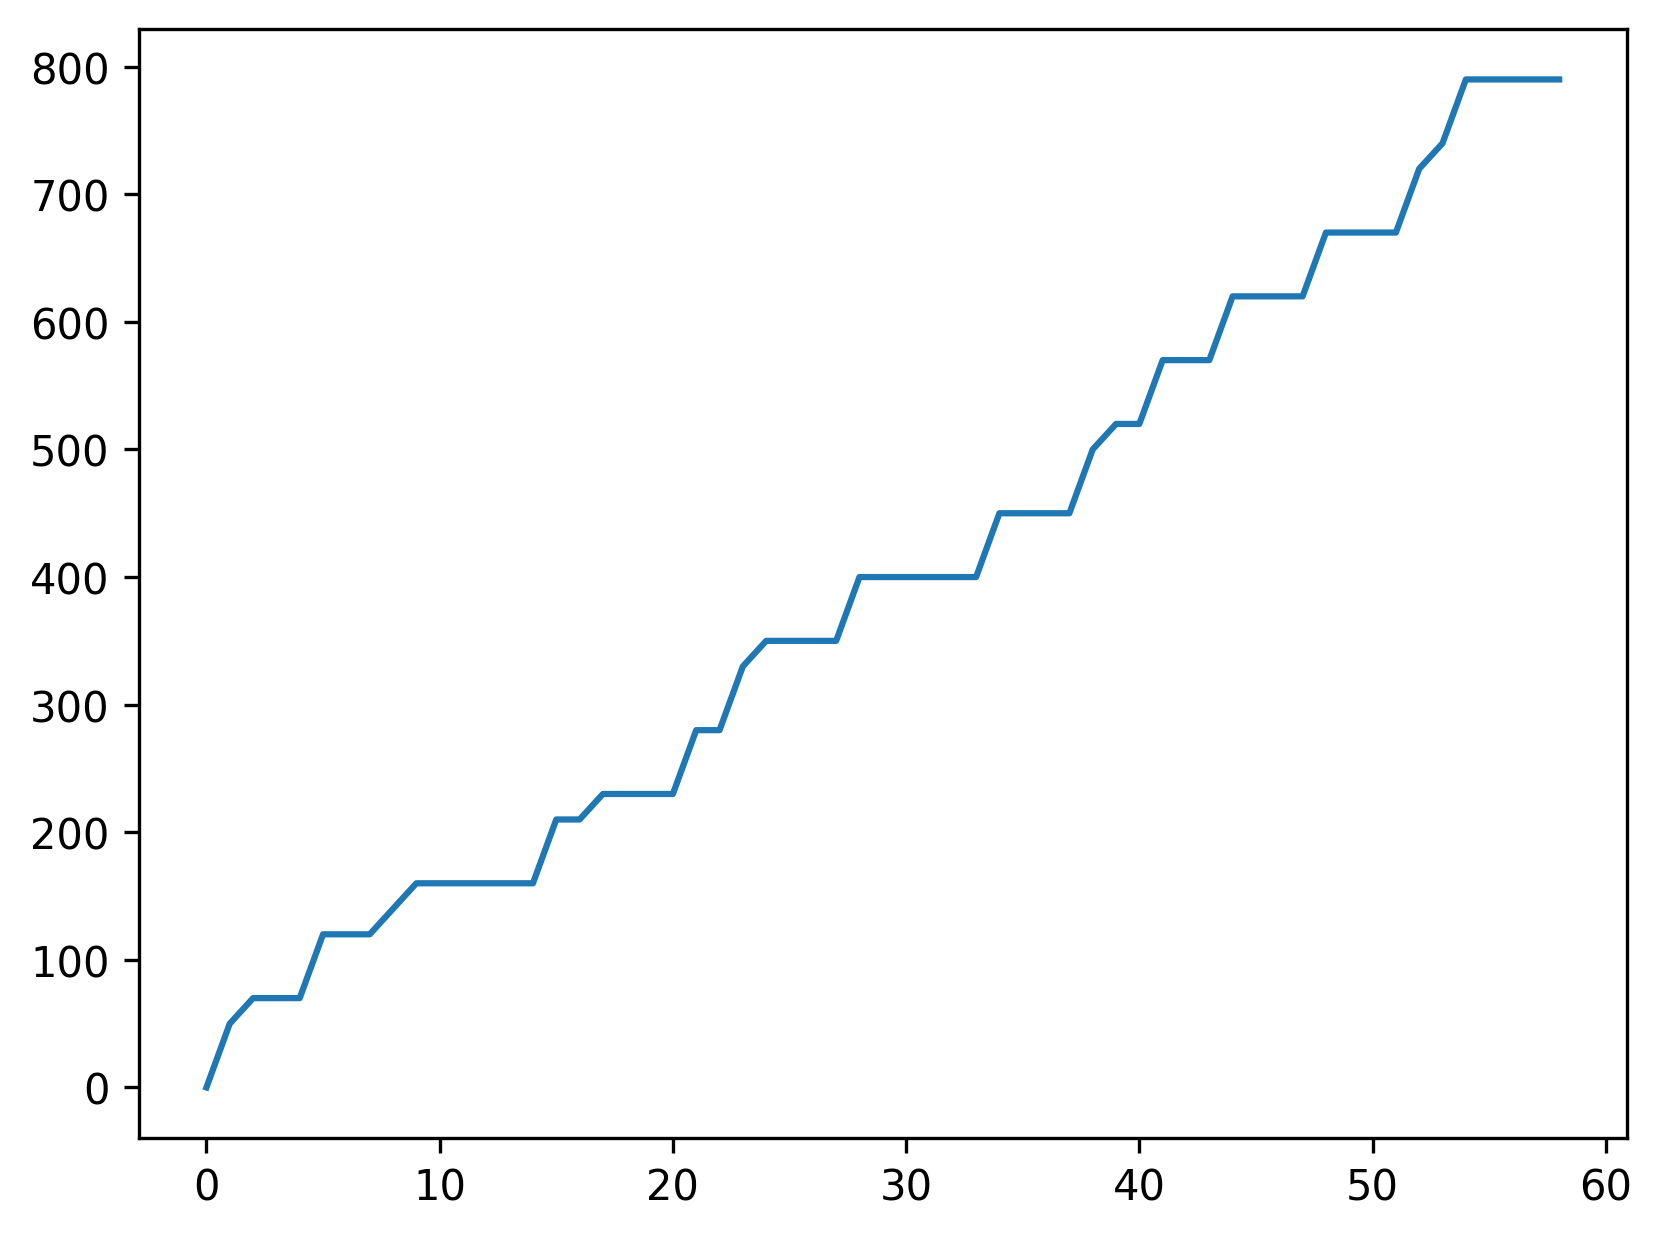

In [98]:
total_score_unprocessed = social_first_half['data.playerScores.0']
total_score = total_score_unprocessed[~np.isnan(total_score_unprocessed)].values[:60]
total_score_first_half_p0 = total_score
plt.plot(total_score_first_half_p0)

In [99]:
total_score_unprocessed = social_second_half['data.playerScores.0']
total_score = total_score_unprocessed[~np.isnan(total_score_unprocessed)].values[:60]
total_score = total_score - total_score[0]
total_score_second_half_p0 = total_score


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 [Text(-10.0, 0, '−10'),
  Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70')])

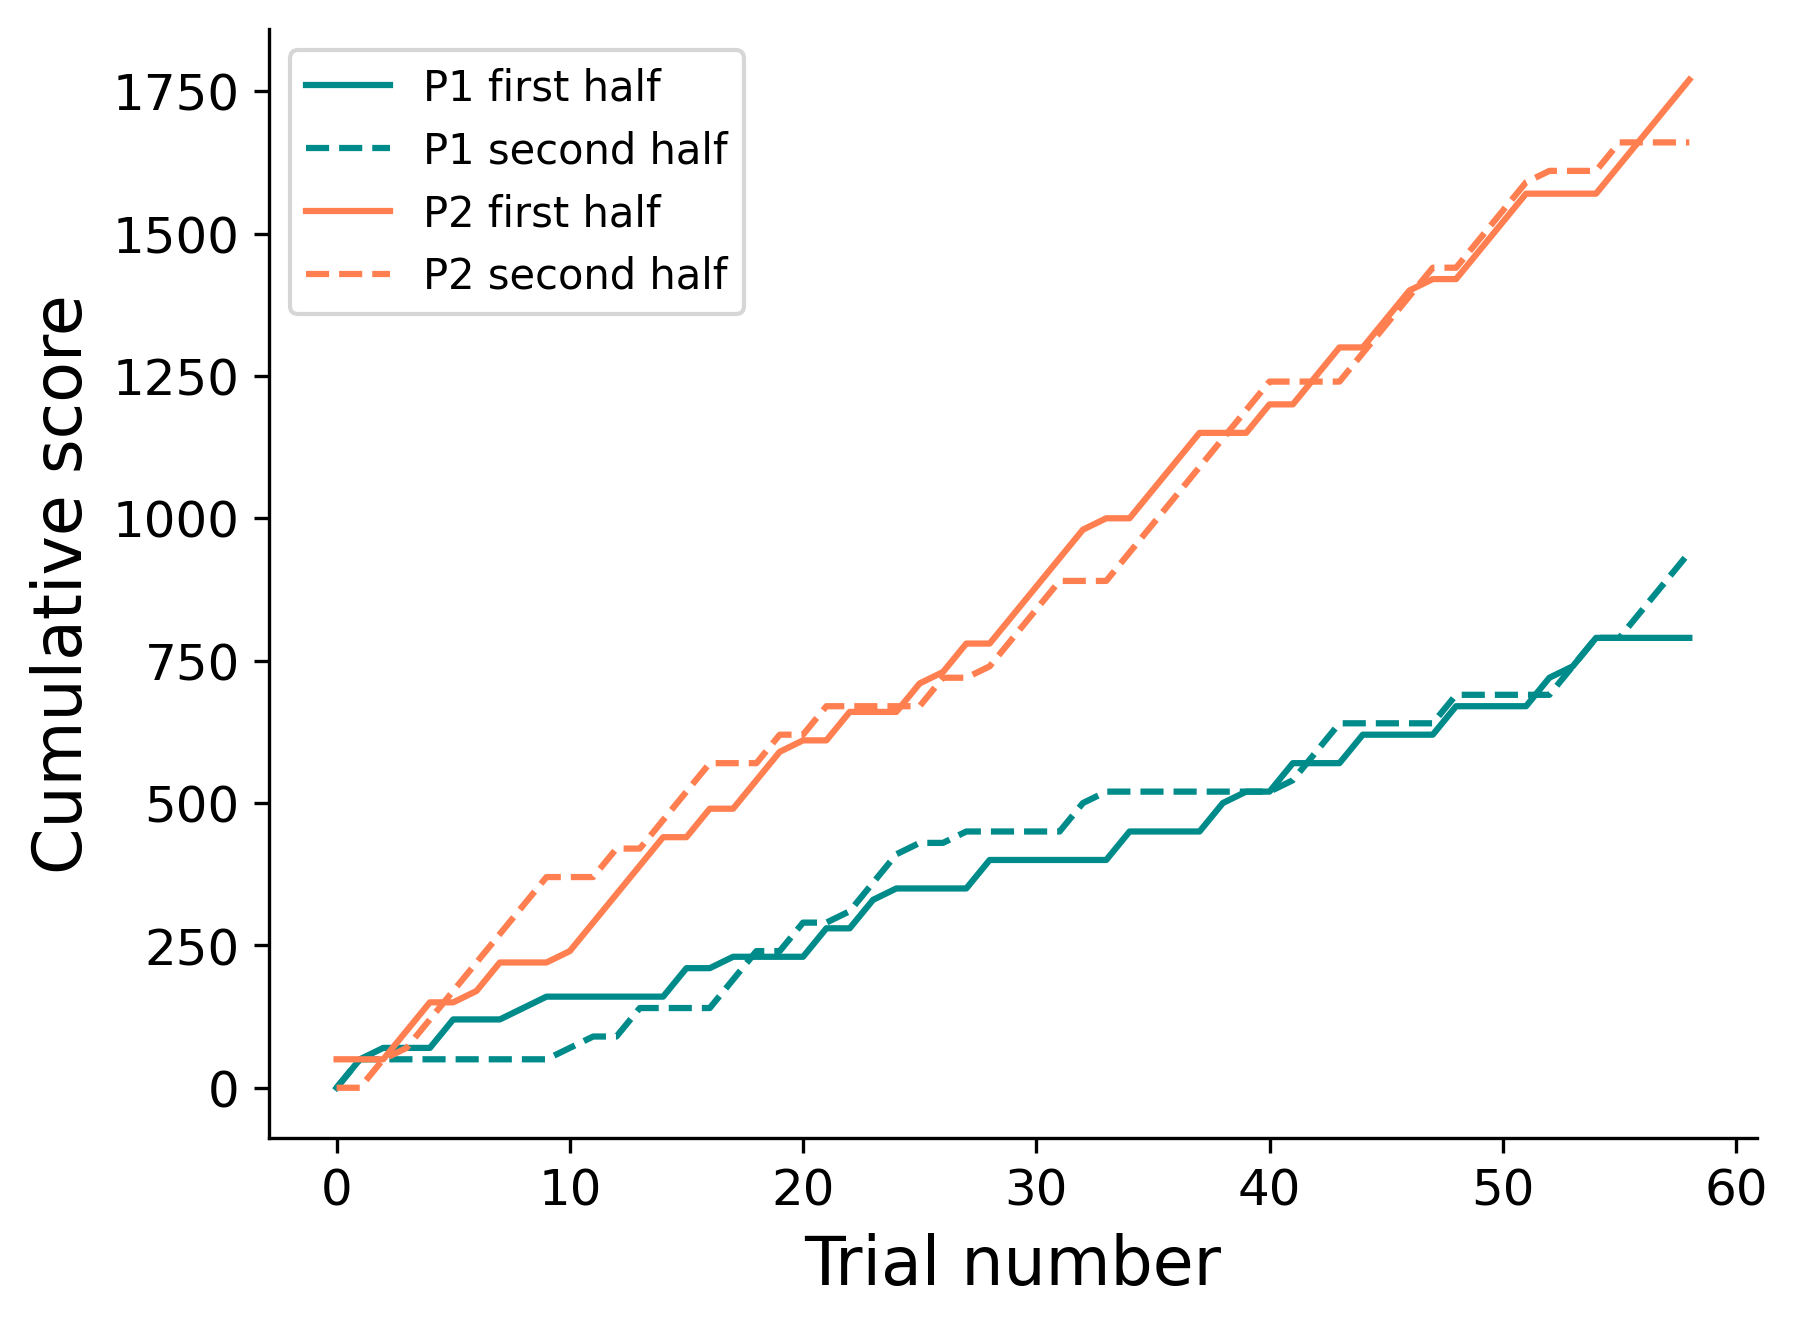

In [100]:
plt.plot(total_score_first_half_p0[:59], color='darkcyan', label='P1 first half')
plt.plot(total_score_second_half_p0[:59], color='darkcyan', linestyle='--', label='P1 second half')
plt.plot(total_score_first_half_p1[:59], color='coral', label='P2 first half')
plt.plot(total_score_second_half_p1[:59], color='coral', linestyle='--', label='P2 second half')

plt.legend()
# Hide the right and top spines
plt.gca().spines[['right', 'top']].set_visible(False)
plt.xlabel('Trial number', fontsize=16)
plt.ylabel('Cumulative score', fontsize=16)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

